In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
from pandas import read_csv, unique

import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [4]:
names = ["NaN", "user_id", "activity", "timestamp", "x_axis", "y_axis", "z_axis"]
data = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/paperwork/WISDM.csv", header=None, names=names, skiprows=1)

def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

df = data.drop('NaN', axis=1)
df["z_axis"].replace(regex = True, inplace = True, to_replace = r';', value = r'')
    # ... and then this column must be transformed to float explicitly
df.dropna(axis=0, how='any', inplace=True)
df.head()
print(df.shape)

(1098203, 6)


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098203 entries, 0 to 1098202
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user_id    1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x_axis     1098203 non-null  float64
 4   y_axis     1098203 non-null  float64
 5   z_axis     1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [6]:
mapping = {'Walking': 0, 'Jogging': 1, 'Upstairs': 2, 'Downstairs': 3, 'Sitting': 4, 'Standing': 5}

# 레이블 인코딩
df['ActivityEncoded'] = df['activity'].map(mapping)
df

,user_id,activity,timestamp,x_axis,y_axis,z_axis,ActivityEncoded
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1
...,...,...,...,...,...,...,...
1098198,19,Sitting,131623331483000,9.000000,-1.570000,1.690000,4
1098199,19,Sitting,131623371431000,9.040000,-1.460000,1.730000,4
1098200,19,Sitting,131623411592000,9.080000,-1.380000,1.690000,4
1098201,19,Sitting,131623491487000,9.000000,-1.460000,1.730000,4


In [7]:
df.loc[:, 'ActivityEncoded'] = df['ActivityEncoded'].astype('int64')

In [8]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_data, y_data = create_dataset(df[["x_axis", "y_axis", "z_axis"]], df.ActivityEncoded, TIME_STEPS,
                                  STEP)

X_train, X_test,y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, stratify=  y_data )
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify=  y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17568, 200, 3) (17568, 1)
(5491, 200, 3) (5491, 1)


In [9]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# 학습 데이터에 OneHotEncoder 적용
enc.fit(y_train)

# 학습, 테스트 및 검증 데이터 변환
y_train_hot = enc.transform(y_train)
y_test_hot = enc.transform(y_test)
y_val_hot = enc.transform(y_val)

# 데이터의 모양 출력
print(X_train.shape, y_train_hot.shape, X_test.shape, y_test_hot.shape)

(17568, 200, 3) (17568, 6) (5491, 200, 3) (5491, 6)


In [10]:
#Epoch 500

BATCH_SIZE = 16

verbose,epochs,batch_size=1,10, BATCH_SIZE

n_timesteps,n_features,n_outputs= X_train.shape[1],X_train.shape[2],y_train_hot.shape[1]
n_timesteps,n_features,n_outputs

(200, 3, 6)

# filter_size_tuning_Conv1-16


In [10]:
#16-16
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=16, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Metal device set to: Apple M2 Pro


2024-05-05 19:37:22.437638: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-05 19:37:22.438535: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 194, 16)           352       
                                                                 
 conv1d_1 (Conv1D)           (None, 188, 16)           1808      
                                                                 
 dropout (Dropout)           (None, 188, 16)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 94, 16)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 90)                38520     
                                                                 
 dropout_1 (Dropout)         (None, 90)                0         
                                                        

In [11]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 19:37:36.833797: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-05 19:37:37.699807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:37:38.063928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:37:38.790480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7305 - accuracy: 0.7490

2024-05-05 19:37:57.185337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:37:57.263138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 66ms/step - loss: 0.7305 - accuracy: 0.7490 - val_loss: 0.5639 - val_accuracy: 0.8071
Epoch 2/20
275/275 [==============================] - 12s 44ms/step - loss: 0.4529 - accuracy: 0.8336 - val_loss: 0.4610 - val_accuracy: 0.8062
Epoch 3/20
275/275 [==============================] - 12s 43ms/step - loss: 0.3362 - accuracy: 0.8655 - val_loss: 0.5832 - val_accuracy: 0.7762
Epoch 4/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2851 - accuracy: 0.8866 - val_loss: 0.2748 - val_accuracy: 0.8930
Epoch 5/20
275/275 [==============================] - 14s 49ms/step - loss: 0.2414 - accuracy: 0.9056 - val_loss: 0.2567 - val_accuracy: 0.9021
Epoch 6/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2163 - accuracy: 0.9175 - val_loss: 0.2190 - val_accuracy: 0.9303
Epoch 7/20
275/275 [==============================] - 12s 44ms/step - loss: 0.1788 - accuracy: 0.9360 - val_loss: 0.1683 - val_accuracy: 0.9419
Epo

2024-05-05 19:41:59.682877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:41:59.749800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 18ms/step
f1_score =  0.9192290264592028
0.9156802039701329
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2123
           1       1.00      0.85      0.92      1710
           2       0.67      0.77      0.71       614
           3       0.71      0.98      0.82       502
           4       1.00      0.95      0.98       300
           5       0.95      1.00      0.98       242

    accuracy                           0.92      5491
   macro avg       0.89      0.92      0.90      5491
weighted avg       0.93      0.92      0.92      5491



<Axes: >

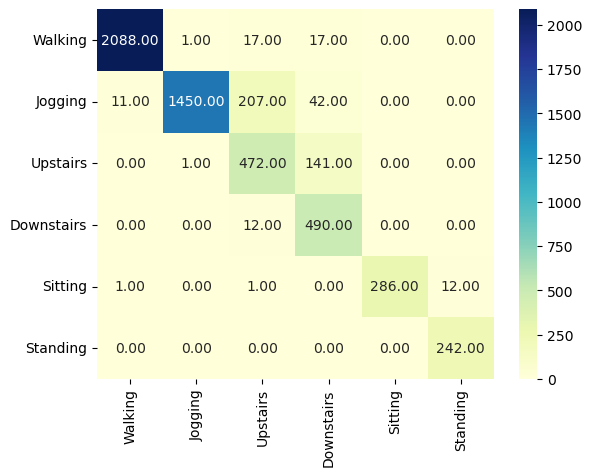

In [12]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [13]:
#16-16
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 194, 16)           352       
                                                                 
 conv1d_3 (Conv1D)           (None, 188, 32)           3616      
                                                                 
 dropout_2 (Dropout)         (None, 188, 32)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 94, 32)           0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 90)                44280     
                                                                 
 dropout_3 (Dropout)         (None, 90)                0         
                                                      

In [14]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 19:42:35.487580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:42:35.675452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:42:36.315355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7199 - accuracy: 0.7497

2024-05-05 19:42:53.487804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:42:53.567375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 21s 61ms/step - loss: 0.7199 - accuracy: 0.7497 - val_loss: 0.6653 - val_accuracy: 0.7263
Epoch 2/20
275/275 [==============================] - 12s 43ms/step - loss: 0.4224 - accuracy: 0.8387 - val_loss: 0.3337 - val_accuracy: 0.8645
Epoch 3/20
275/275 [==============================] - 12s 43ms/step - loss: 0.3157 - accuracy: 0.8772 - val_loss: 0.4160 - val_accuracy: 0.8440
Epoch 4/20
275/275 [==============================] - 12s 43ms/step - loss: 0.2501 - accuracy: 0.9064 - val_loss: 0.3109 - val_accuracy: 0.8880
Epoch 5/20
275/275 [==============================] - 12s 43ms/step - loss: 0.1976 - accuracy: 0.9315 - val_loss: 0.3148 - val_accuracy: 0.8948
Epoch 6/20
275/275 [==============================] - 12s 43ms/step - loss: 0.1615 - accuracy: 0.9472 - val_loss: 0.4293 - val_accuracy: 0.8408
Epoch 7/20
275/275 [==============================] - 12s 43ms/step - loss: 0.1425 - accuracy: 0.9518 - val_loss: 0.2619 - val_accuracy: 0.9089
Epo

2024-05-05 19:46:54.261806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:46:54.325506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9554427506617863
0.9544709524676743
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.91      0.95      1710
           2       0.82      0.92      0.87       614
           3       0.83      0.97      0.89       502
           4       1.00      0.96      0.98       300
           5       0.95      1.00      0.98       242

    accuracy                           0.95      5491
   macro avg       0.93      0.96      0.94      5491
weighted avg       0.96      0.95      0.96      5491



<Axes: >

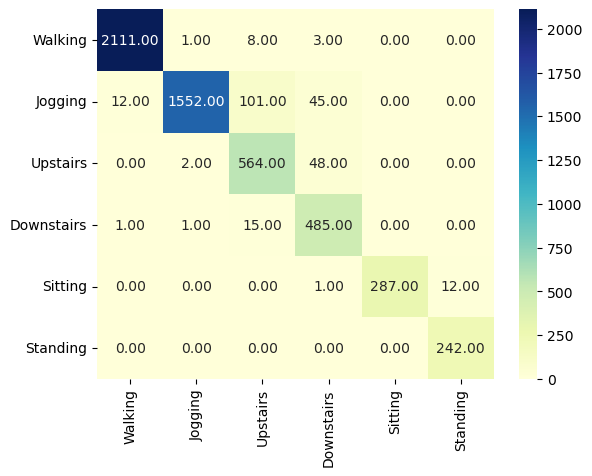

In [15]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [16]:
#16-64
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 194, 16)           352       
                                                                 
 conv1d_5 (Conv1D)           (None, 188, 64)           7232      
                                                                 
 dropout_4 (Dropout)         (None, 188, 64)           0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 94, 64)           0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_5 (Dropout)         (None, 90)                0         
                                                      

In [17]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 19:47:26.242075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:47:26.420780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:47:27.055309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6743 - accuracy: 0.7651

2024-05-05 19:47:43.612740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:47:43.688535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 21s 60ms/step - loss: 0.6743 - accuracy: 0.7651 - val_loss: 0.5113 - val_accuracy: 0.8076
Epoch 2/20
275/275 [==============================] - 12s 44ms/step - loss: 0.3631 - accuracy: 0.8583 - val_loss: 0.3358 - val_accuracy: 0.8602
Epoch 3/20
275/275 [==============================] - 12s 44ms/step - loss: 0.2673 - accuracy: 0.8926 - val_loss: 0.2797 - val_accuracy: 0.8903
Epoch 4/20
275/275 [==============================] - 12s 44ms/step - loss: 0.2113 - accuracy: 0.9225 - val_loss: 0.3498 - val_accuracy: 0.8634
Epoch 5/20
275/275 [==============================] - 12s 43ms/step - loss: 0.1745 - accuracy: 0.9378 - val_loss: 0.2656 - val_accuracy: 0.9019
Epoch 6/20
275/275 [==============================] - 12s 43ms/step - loss: 0.1348 - accuracy: 0.9521 - val_loss: 0.1288 - val_accuracy: 0.9606
Epoch 7/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1304 - accuracy: 0.9566 - val_loss: 0.1565 - val_accuracy: 0.9488
Epo

2024-05-05 19:51:56.526377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:51:56.591683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9856973915754166
0.9856128209797851
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2123
           1       1.00      0.98      0.99      1710
           2       0.96      0.95      0.96       614
           3       0.93      0.98      0.96       502
           4       0.99      0.99      0.99       300
           5       0.99      0.99      0.99       242

    accuracy                           0.99      5491
   macro avg       0.98      0.98      0.98      5491
weighted avg       0.99      0.99      0.99      5491



<Axes: >

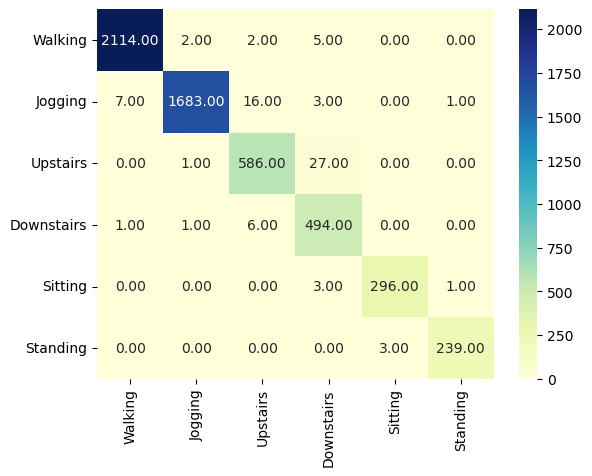

In [18]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [19]:
#16-128
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=128, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 194, 16)           352       
                                                                 
 conv1d_7 (Conv1D)           (None, 188, 128)          14464     
                                                                 
 dropout_6 (Dropout)         (None, 188, 128)          0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 94, 128)          0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 90)                78840     
                                                                 
 dropout_7 (Dropout)         (None, 90)                0         
                                                      

In [20]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 19:52:33.757511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:52:33.947837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:52:34.593493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7077 - accuracy: 0.7544

2024-05-05 19:52:51.895945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:52:51.971050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 22s 62ms/step - loss: 0.7077 - accuracy: 0.7544 - val_loss: 0.4079 - val_accuracy: 0.8374
Epoch 2/20
275/275 [==============================] - 12s 45ms/step - loss: 0.3830 - accuracy: 0.8474 - val_loss: 0.2848 - val_accuracy: 0.8798
Epoch 3/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2738 - accuracy: 0.8871 - val_loss: 0.2341 - val_accuracy: 0.9030
Epoch 4/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2237 - accuracy: 0.9133 - val_loss: 0.2663 - val_accuracy: 0.9026
Epoch 5/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1768 - accuracy: 0.9348 - val_loss: 0.1408 - val_accuracy: 0.9497
Epoch 6/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1319 - accuracy: 0.9543 - val_loss: 0.1110 - val_accuracy: 0.9640
Epoch 7/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1091 - accuracy: 0.9648 - val_loss: 0.1805 - val_accuracy: 0.9388
Epo

172/172 [==============================] - 3s 16ms/step
f1_score =  0.98380414087155
0.9837916590784921
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       1.00      0.99      0.99      1710
           2       0.95      0.97      0.96       614
           3       0.97      0.95      0.96       502
           4       1.00      0.94      0.97       300
           5       0.94      1.00      0.97       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

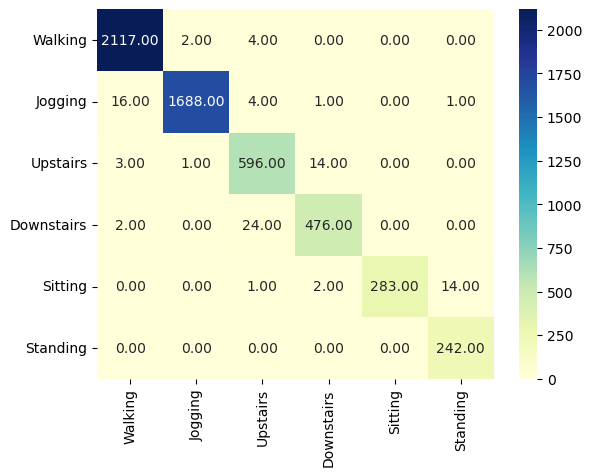

In [22]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [23]:
#16-256
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=256, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 194, 16)           352       
                                                                 
 conv1d_9 (Conv1D)           (None, 188, 256)          28928     
                                                                 
 dropout_8 (Dropout)         (None, 188, 256)          0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 94, 256)          0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 90)                124920    
                                                                 
 dropout_9 (Dropout)         (None, 90)                0         
                                                      

In [24]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 19:58:06.282607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:58:06.501170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:58:07.185449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7359 - accuracy: 0.7499

2024-05-05 19:58:25.754232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 19:58:25.839423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 24s 69ms/step - loss: 0.7359 - accuracy: 0.7499 - val_loss: 0.7111 - val_accuracy: 0.7441
Epoch 2/20
275/275 [==============================] - 13s 48ms/step - loss: 0.3806 - accuracy: 0.8561 - val_loss: 0.3339 - val_accuracy: 0.8748
Epoch 3/20
275/275 [==============================] - 14s 51ms/step - loss: 0.2373 - accuracy: 0.9111 - val_loss: 0.3236 - val_accuracy: 0.8871
Epoch 4/20
275/275 [==============================] - 14s 52ms/step - loss: 0.1882 - accuracy: 0.9327 - val_loss: 0.1459 - val_accuracy: 0.9490
Epoch 5/20
275/275 [==============================] - 15s 53ms/step - loss: 0.1464 - accuracy: 0.9497 - val_loss: 0.1277 - val_accuracy: 0.9602
Epoch 6/20
275/275 [==============================] - 15s 55ms/step - loss: 0.1185 - accuracy: 0.9600 - val_loss: 0.1086 - val_accuracy: 0.9572
Epoch 7/20
275/275 [==============================] - 15s 53ms/step - loss: 0.1040 - accuracy: 0.9667 - val_loss: 0.0997 - val_accuracy: 0.9654
Epo

2024-05-05 20:03:06.018195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:03:06.086094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9872488987428434
0.9872518666909488
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2123
           1       0.99      1.00      0.99      1710
           2       0.97      0.97      0.97       614
           3       0.96      0.97      0.96       502
           4       1.00      0.97      0.98       300
           5       0.97      0.99      0.98       242

    accuracy                           0.99      5491
   macro avg       0.98      0.98      0.98      5491
weighted avg       0.99      0.99      0.99      5491



<Axes: >

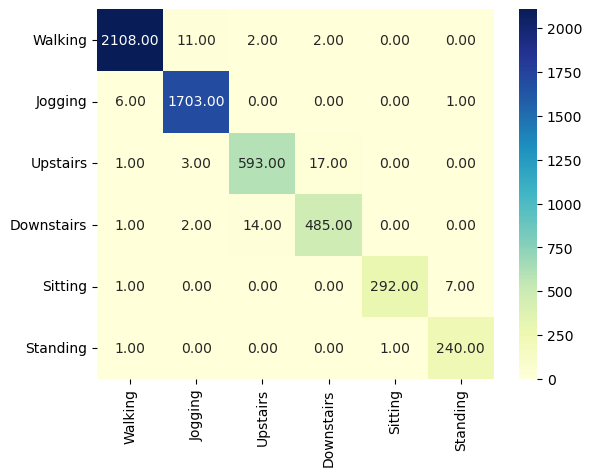

In [25]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [26]:
#16-512
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=512, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 194, 16)           352       
                                                                 
 conv1d_11 (Conv1D)          (None, 188, 512)          57856     
                                                                 
 dropout_10 (Dropout)        (None, 188, 512)          0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 94, 512)          0         
 1D)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 90)                217080    
                                                                 
 dropout_11 (Dropout)        (None, 90)                0         
                                                      

In [27]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 20:03:18.691020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:03:18.879695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:03:19.547075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7658 - accuracy: 0.7411

2024-05-05 20:03:39.353122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:03:39.431253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 24s 71ms/step - loss: 0.7658 - accuracy: 0.7411 - val_loss: 0.5059 - val_accuracy: 0.8179
Epoch 2/20
275/275 [==============================] - 15s 54ms/step - loss: 0.4111 - accuracy: 0.8439 - val_loss: 0.2898 - val_accuracy: 0.8841
Epoch 3/20
275/275 [==============================] - 15s 55ms/step - loss: 0.2860 - accuracy: 0.8884 - val_loss: 0.3717 - val_accuracy: 0.8545
Epoch 4/20
275/275 [==============================] - 15s 55ms/step - loss: 0.2319 - accuracy: 0.9131 - val_loss: 0.2161 - val_accuracy: 0.9226
Epoch 5/20
275/275 [==============================] - 15s 55ms/step - loss: 0.1869 - accuracy: 0.9334 - val_loss: 0.1508 - val_accuracy: 0.9463
Epoch 6/20
275/275 [==============================] - 15s 55ms/step - loss: 0.1494 - accuracy: 0.9467 - val_loss: 0.1371 - val_accuracy: 0.9554
Epoch 7/20
275/275 [==============================] - 15s 56ms/step - loss: 0.1207 - accuracy: 0.9606 - val_loss: 0.1054 - val_accuracy: 0.9643
Epo

2024-05-05 20:13:49.251544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:13:49.332629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9845503980800423
0.9845201238390093
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.99      0.99      1710
           2       0.95      0.96      0.95       614
           3       0.94      0.95      0.94       502
           4       1.00      0.97      0.98       300
           5       0.98      1.00      0.99       242

    accuracy                           0.98      5491
   macro avg       0.98      0.98      0.98      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

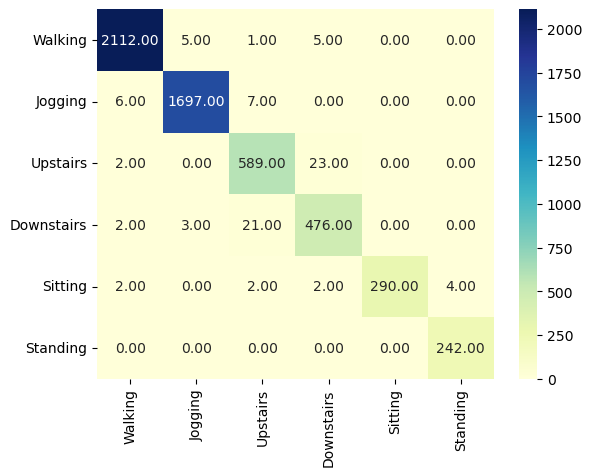

In [28]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# filter_size_tuning_Conv1-32

In [29]:
#32-16
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=16, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 194, 32)           704       
                                                                 
 conv1d_13 (Conv1D)          (None, 188, 16)           3600      
                                                                 
 dropout_12 (Dropout)        (None, 188, 16)           0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 94, 16)           0         
 1D)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 90)                38520     
                                                                 
 dropout_13 (Dropout)        (None, 90)                0         
                                                      

In [30]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 20:16:46.450305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:16:46.642835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:16:47.291482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7290 - accuracy: 0.7498

2024-05-05 20:17:05.420554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:17:05.500417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 66ms/step - loss: 0.7290 - accuracy: 0.7498 - val_loss: 0.5114 - val_accuracy: 0.8286
Epoch 2/20
275/275 [==============================] - 13s 48ms/step - loss: 0.3943 - accuracy: 0.8492 - val_loss: 0.3171 - val_accuracy: 0.8711
Epoch 3/20
275/275 [==============================] - 14s 50ms/step - loss: 0.2748 - accuracy: 0.8984 - val_loss: 0.3629 - val_accuracy: 0.8745
Epoch 4/20
275/275 [==============================] - 14s 50ms/step - loss: 0.2522 - accuracy: 0.9093 - val_loss: 0.3195 - val_accuracy: 0.8878
Epoch 5/20
275/275 [==============================] - 13s 49ms/step - loss: 0.1897 - accuracy: 0.9328 - val_loss: 0.2164 - val_accuracy: 0.9274
Epoch 6/20
275/275 [==============================] - 14s 50ms/step - loss: 0.1577 - accuracy: 0.9469 - val_loss: 0.3830 - val_accuracy: 0.8604
Epoch 7/20
275/275 [==============================] - 13s 49ms/step - loss: 0.1380 - accuracy: 0.9549 - val_loss: 0.1687 - val_accuracy: 0.9476
Epo

2024-05-05 20:22:24.875657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:22:24.946482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9645449610844935
0.9641231105445274
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2123
           1       1.00      0.97      0.98      1710
           2       0.94      0.86      0.90       614
           3       0.82      0.96      0.88       502
           4       0.97      0.95      0.96       300
           5       0.95      0.98      0.96       242

    accuracy                           0.96      5491
   macro avg       0.94      0.95      0.95      5491
weighted avg       0.97      0.96      0.96      5491



<Axes: >

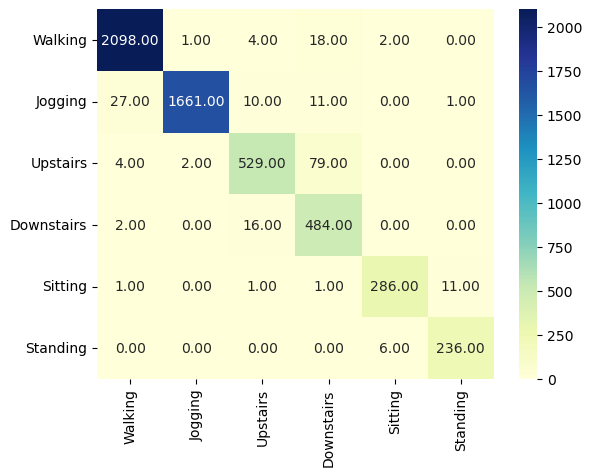

In [34]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [35]:
#32-32
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 194, 32)           704       
                                                                 
 conv1d_15 (Conv1D)          (None, 188, 32)           7200      
                                                                 
 dropout_14 (Dropout)        (None, 188, 32)           0         
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 94, 32)           0         
 1D)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 90)                44280     
                                                                 
 dropout_15 (Dropout)        (None, 90)                0         
                                                      

In [36]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 20:22:52.353784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:22:52.553100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:22:53.238963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7108 - accuracy: 0.7564

2024-05-05 20:23:11.334132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:23:11.424543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 66ms/step - loss: 0.7108 - accuracy: 0.7564 - val_loss: 0.6034 - val_accuracy: 0.7464
Epoch 2/20
275/275 [==============================] - 13s 47ms/step - loss: 0.3942 - accuracy: 0.8550 - val_loss: 0.3403 - val_accuracy: 0.8761
Epoch 3/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2802 - accuracy: 0.8966 - val_loss: 0.4147 - val_accuracy: 0.8327
Epoch 4/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2238 - accuracy: 0.9213 - val_loss: 0.1683 - val_accuracy: 0.9454
Epoch 5/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1730 - accuracy: 0.9401 - val_loss: 0.3645 - val_accuracy: 0.8830
Epoch 6/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1439 - accuracy: 0.9541 - val_loss: 0.2047 - val_accuracy: 0.9310
Epoch 7/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1280 - accuracy: 0.9584 - val_loss: 0.1491 - val_accuracy: 0.9513
Epo

2024-05-05 20:29:01.536454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:29:01.613507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9715794887936477
0.9715898743398288
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.98      0.85      0.91       614
           3       0.85      0.99      0.91       502
           4       1.00      0.94      0.97       300
           5       0.94      0.99      0.97       242

    accuracy                           0.97      5491
   macro avg       0.96      0.96      0.96      5491
weighted avg       0.97      0.97      0.97      5491



<Axes: >

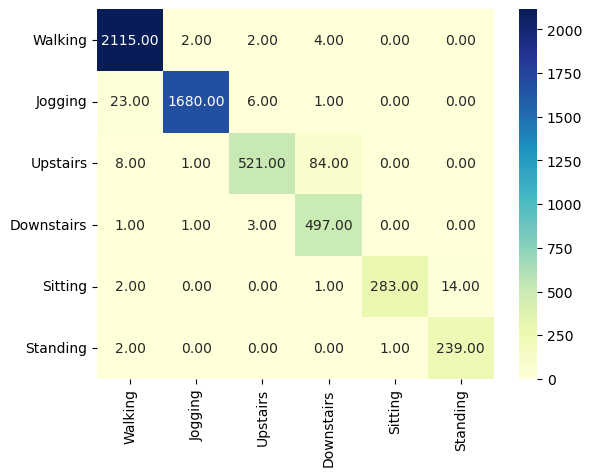

In [37]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [38]:
#32-64
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 194, 32)           704       
                                                                 
 conv1d_17 (Conv1D)          (None, 188, 64)           14400     
                                                                 
 dropout_16 (Dropout)        (None, 188, 64)           0         
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 94, 64)           0         
 1D)                                                             
                                                                 
 lstm_8 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_17 (Dropout)        (None, 90)                0         
                                                      

In [39]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 20:29:54.626335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:29:54.834213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:29:55.517116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7204 - accuracy: 0.7538

2024-05-05 20:30:13.131089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:30:13.213382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 22s 64ms/step - loss: 0.7204 - accuracy: 0.7538 - val_loss: 0.4766 - val_accuracy: 0.8015
Epoch 2/20
275/275 [==============================] - 13s 47ms/step - loss: 0.3994 - accuracy: 0.8526 - val_loss: 0.3517 - val_accuracy: 0.8691
Epoch 3/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2705 - accuracy: 0.9004 - val_loss: 0.2126 - val_accuracy: 0.9203
Epoch 4/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2026 - accuracy: 0.9296 - val_loss: 0.4662 - val_accuracy: 0.8288
Epoch 5/20
275/275 [==============================] - 13s 48ms/step - loss: 0.1588 - accuracy: 0.9472 - val_loss: 0.1244 - val_accuracy: 0.9577
Epoch 6/20
275/275 [==============================] - 13s 48ms/step - loss: 0.1303 - accuracy: 0.9578 - val_loss: 0.1325 - val_accuracy: 0.9565
Epoch 7/20
275/275 [==============================] - 13s 48ms/step - loss: 0.1416 - accuracy: 0.9564 - val_loss: 0.2375 - val_accuracy: 0.9260
Epo

2024-05-05 20:34:54.815294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:34:54.887506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9716674250140614
0.9714077581496995
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.95      0.98      1710
           2       0.91      0.93      0.92       614
           3       0.89      0.99      0.93       502
           4       0.97      0.98      0.97       300
           5       0.99      0.96      0.98       242

    accuracy                           0.97      5491
   macro avg       0.96      0.97      0.96      5491
weighted avg       0.97      0.97      0.97      5491



<Axes: >

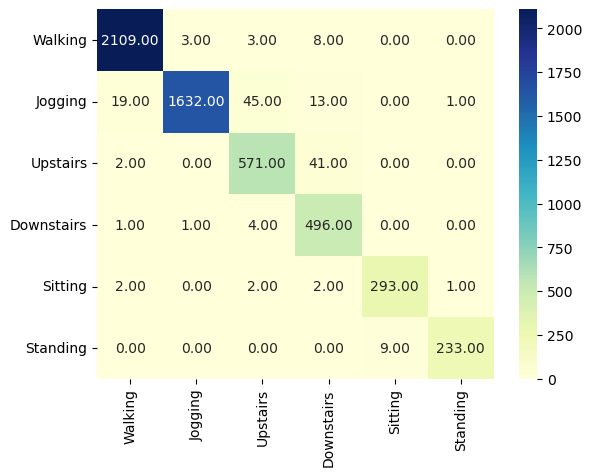

In [40]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [41]:
#32-128
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=128, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 194, 32)           704       
                                                                 
 conv1d_19 (Conv1D)          (None, 188, 128)          28800     
                                                                 
 dropout_18 (Dropout)        (None, 188, 128)          0         
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 94, 128)          0         
 1D)                                                             
                                                                 
 lstm_9 (LSTM)               (None, 90)                78840     
                                                                 
 dropout_19 (Dropout)        (None, 90)                0         
                                                      

In [42]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 20:35:35.462535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:35:35.675812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:35:36.387377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7487 - accuracy: 0.7465

2024-05-05 20:35:54.880368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:35:54.969925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 68ms/step - loss: 0.7487 - accuracy: 0.7465 - val_loss: 0.5075 - val_accuracy: 0.8112
Epoch 2/20
275/275 [==============================] - 13s 48ms/step - loss: 0.4163 - accuracy: 0.8399 - val_loss: 0.2997 - val_accuracy: 0.8786
Epoch 3/20
275/275 [==============================] - 14s 51ms/step - loss: 0.2721 - accuracy: 0.8974 - val_loss: 0.2493 - val_accuracy: 0.9130
Epoch 4/20
275/275 [==============================] - 14s 50ms/step - loss: 0.2004 - accuracy: 0.9274 - val_loss: 0.1641 - val_accuracy: 0.9413
Epoch 5/20
275/275 [==============================] - 14s 49ms/step - loss: 0.1603 - accuracy: 0.9448 - val_loss: 0.1765 - val_accuracy: 0.9424
Epoch 6/20
275/275 [==============================] - 13s 49ms/step - loss: 0.1221 - accuracy: 0.9582 - val_loss: 0.1424 - val_accuracy: 0.9506
Epoch 7/20
275/275 [==============================] - 14s 50ms/step - loss: 0.1040 - accuracy: 0.9651 - val_loss: 0.0839 - val_accuracy: 0.9756
Epo

2024-05-05 20:40:29.413794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:40:29.488961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9806155936474338
0.9805135676561646
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.99      1.00      1710
           2       0.98      0.91      0.95       614
           3       0.89      0.99      0.94       502
           4       1.00      0.94      0.97       300
           5       0.93      1.00      0.96       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

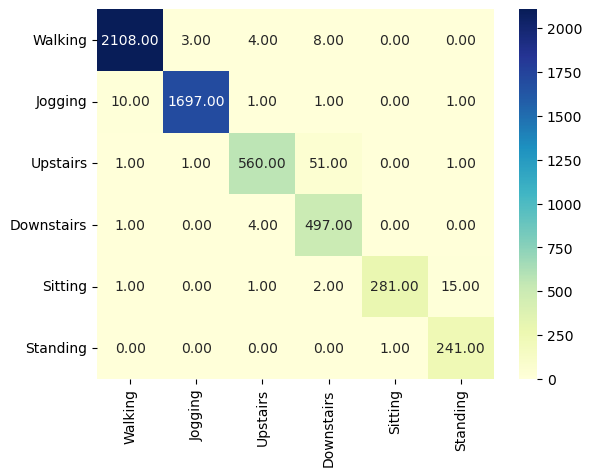

In [43]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [44]:
#32-256
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=256, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 194, 32)           704       
                                                                 
 conv1d_21 (Conv1D)          (None, 188, 256)          57600     
                                                                 
 dropout_20 (Dropout)        (None, 188, 256)          0         
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 94, 256)          0         
 g1D)                                                            
                                                                 
 lstm_10 (LSTM)              (None, 90)                124920    
                                                                 
 dropout_21 (Dropout)        (None, 90)                0         
                                                     

In [45]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 20:41:08.889614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:41:09.090643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:41:09.783871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7441 - accuracy: 0.7486

2024-05-05 20:41:29.562990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 20:41:29.654062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 24s 73ms/step - loss: 0.7441 - accuracy: 0.7486 - val_loss: 0.4848 - val_accuracy: 0.8133
Epoch 2/20
275/275 [==============================] - 15s 53ms/step - loss: 0.4034 - accuracy: 0.8504 - val_loss: 0.5148 - val_accuracy: 0.7898
Epoch 3/20
275/275 [==============================] - 15s 54ms/step - loss: 0.2807 - accuracy: 0.8923 - val_loss: 0.2398 - val_accuracy: 0.9101
Epoch 4/20
275/275 [==============================] - 15s 53ms/step - loss: 0.2118 - accuracy: 0.9238 - val_loss: 0.2124 - val_accuracy: 0.9255
Epoch 5/20
275/275 [==============================] - 15s 53ms/step - loss: 0.1668 - accuracy: 0.9440 - val_loss: 0.1630 - val_accuracy: 0.9433
Epoch 6/20
275/275 [==============================] - 15s 55ms/step - loss: 0.1392 - accuracy: 0.9561 - val_loss: 0.1948 - val_accuracy: 0.9315
Epoch 7/20
275/275 [==============================] - 15s 53ms/step - loss: 0.1172 - accuracy: 0.9612 - val_loss: 0.1145 - val_accuracy: 0.9622
Epo

2024-05-05 21:08:57.163865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:08:57.252618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 21ms/step
f1_score =  0.9852427226528817
0.9852485885995265
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2123
           1       0.99      0.99      0.99      1710
           2       0.93      0.98      0.95       614
           3       0.97      0.91      0.94       502
           4       1.00      0.99      0.99       300
           5       0.99      1.00      0.99       242

    accuracy                           0.99      5491
   macro avg       0.98      0.98      0.98      5491
weighted avg       0.99      0.99      0.99      5491



<Axes: >

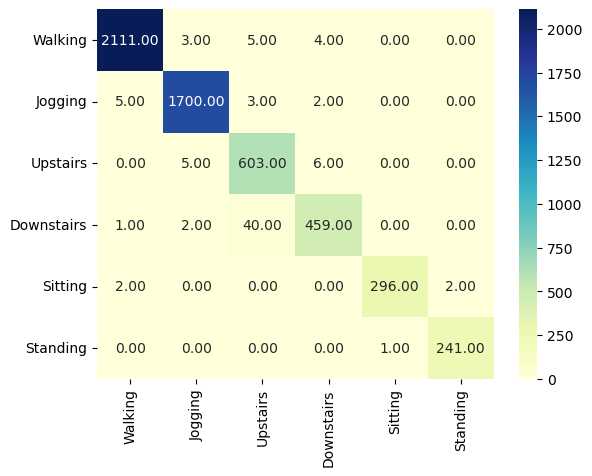

In [46]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [47]:
#32-512
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=512, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 194, 32)           704       
                                                                 
 conv1d_23 (Conv1D)          (None, 188, 512)          115200    
                                                                 
 dropout_22 (Dropout)        (None, 188, 512)          0         
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 94, 512)          0         
 g1D)                                                            
                                                                 
 lstm_11 (LSTM)              (None, 90)                217080    
                                                                 
 dropout_23 (Dropout)        (None, 90)                0         
                                                     

In [48]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 21:10:02.992949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:10:03.188358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:10:03.940354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7303 - accuracy: 0.7519

2024-05-05 21:10:25.748135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:10:25.836810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 27s 80ms/step - loss: 0.7303 - accuracy: 0.7519 - val_loss: 0.4403 - val_accuracy: 0.8470
Epoch 2/20
275/275 [==============================] - 17s 62ms/step - loss: 0.3589 - accuracy: 0.8698 - val_loss: 0.3880 - val_accuracy: 0.8525
Epoch 3/20
275/275 [==============================] - 17s 61ms/step - loss: 0.2474 - accuracy: 0.9100 - val_loss: 0.2282 - val_accuracy: 0.9249
Epoch 4/20
275/275 [==============================] - 17s 62ms/step - loss: 0.1890 - accuracy: 0.9352 - val_loss: 0.4195 - val_accuracy: 0.8556
Epoch 5/20
275/275 [==============================] - 17s 63ms/step - loss: 0.1464 - accuracy: 0.9504 - val_loss: 0.1646 - val_accuracy: 0.9381
Epoch 6/20
275/275 [==============================] - 17s 62ms/step - loss: 0.1160 - accuracy: 0.9627 - val_loss: 0.1276 - val_accuracy: 0.9620
Epoch 7/20
275/275 [==============================] - 17s 64ms/step - loss: 0.1076 - accuracy: 0.9654 - val_loss: 0.0940 - val_accuracy: 0.9731
Epo

2024-05-05 21:16:01.596865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:16:01.671637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 21ms/step
f1_score =  0.9874229624846296
0.9874339828810781
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2123
           1       1.00      0.99      1.00      1710
           2       0.96      0.98      0.97       614
           3       0.96      0.97      0.96       502
           4       1.00      0.93      0.96       300
           5       0.96      1.00      0.98       242

    accuracy                           0.99      5491
   macro avg       0.98      0.98      0.98      5491
weighted avg       0.99      0.99      0.99      5491



<Axes: >

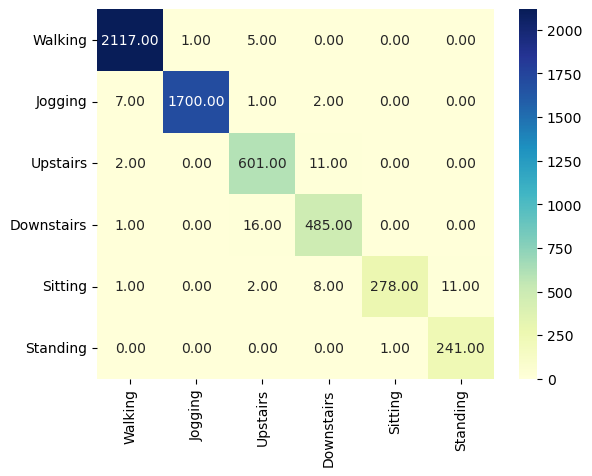

In [49]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# filter_size_tuning_Conv1-64

In [50]:
#64-16
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=16, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 194, 64)           1408      
                                                                 
 conv1d_25 (Conv1D)          (None, 188, 16)           7184      
                                                                 
 dropout_24 (Dropout)        (None, 188, 16)           0         
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 94, 16)           0         
 g1D)                                                            
                                                                 
 lstm_12 (LSTM)              (None, 90)                38520     
                                                                 
 dropout_25 (Dropout)        (None, 90)                0         
                                                     

In [51]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 21:16:27.587468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:16:27.813642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:16:28.505316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6999 - accuracy: 0.7614

2024-05-05 21:16:47.017795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:16:47.110994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 68ms/step - loss: 0.6999 - accuracy: 0.7614 - val_loss: 0.6181 - val_accuracy: 0.7917
Epoch 2/20
275/275 [==============================] - 14s 51ms/step - loss: 0.4280 - accuracy: 0.8414 - val_loss: 0.3713 - val_accuracy: 0.8586
Epoch 3/20
275/275 [==============================] - 14s 49ms/step - loss: 0.3148 - accuracy: 0.8791 - val_loss: 0.4146 - val_accuracy: 0.8324
Epoch 4/20
275/275 [==============================] - 14s 53ms/step - loss: 0.2602 - accuracy: 0.9017 - val_loss: 0.5269 - val_accuracy: 0.7908
Epoch 5/20
275/275 [==============================] - 15s 53ms/step - loss: 0.2248 - accuracy: 0.9190 - val_loss: 0.4076 - val_accuracy: 0.8163
Epoch 6/20
275/275 [==============================] - 15s 54ms/step - loss: 0.1816 - accuracy: 0.9357 - val_loss: 0.3371 - val_accuracy: 0.8859
Epoch 7/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1494 - accuracy: 0.9475 - val_loss: 0.5164 - val_accuracy: 0.8461
Epo

2024-05-05 21:21:26.182420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:21:26.253153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 22ms/step
f1_score =  0.9530689054870699
0.9522855581861227
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2123
           1       1.00      0.97      0.99      1710
           2       0.95      0.73      0.83       614
           3       0.71      0.99      0.83       502
           4       1.00      0.95      0.97       300
           5       0.95      1.00      0.97       242

    accuracy                           0.95      5491
   macro avg       0.93      0.94      0.93      5491
weighted avg       0.96      0.95      0.95      5491



<Axes: >

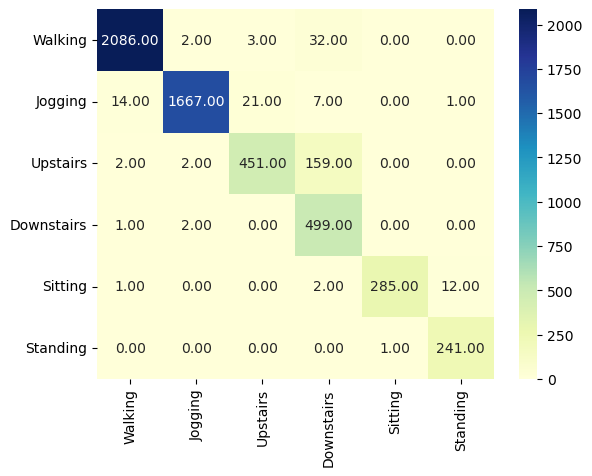

In [52]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [53]:
#64-32
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 194, 64)           1408      
                                                                 
 conv1d_27 (Conv1D)          (None, 188, 32)           14368     
                                                                 
 dropout_26 (Dropout)        (None, 188, 32)           0         
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 94, 32)           0         
 g1D)                                                            
                                                                 
 lstm_13 (LSTM)              (None, 90)                44280     
                                                                 
 dropout_27 (Dropout)        (None, 90)                0         
                                                     

In [54]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 21:21:48.974886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:21:49.188726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:21:49.912552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6660 - accuracy: 0.7692

2024-05-05 21:22:09.192021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:22:09.283320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 25s 71ms/step - loss: 0.6660 - accuracy: 0.7692 - val_loss: 0.5980 - val_accuracy: 0.7605
Epoch 2/20
275/275 [==============================] - 15s 53ms/step - loss: 0.3806 - accuracy: 0.8575 - val_loss: 0.4454 - val_accuracy: 0.8397
Epoch 3/20
275/275 [==============================] - 15s 53ms/step - loss: 0.2760 - accuracy: 0.8981 - val_loss: 0.3819 - val_accuracy: 0.8361
Epoch 4/20
275/275 [==============================] - 15s 54ms/step - loss: 0.2107 - accuracy: 0.9249 - val_loss: 0.3095 - val_accuracy: 0.9085
Epoch 5/20
275/275 [==============================] - 15s 55ms/step - loss: 0.1948 - accuracy: 0.9331 - val_loss: 0.1623 - val_accuracy: 0.9442
Epoch 6/20
275/275 [==============================] - 15s 55ms/step - loss: 0.1602 - accuracy: 0.9453 - val_loss: 0.1923 - val_accuracy: 0.9276
Epoch 7/20
275/275 [==============================] - 15s 53ms/step - loss: 0.1291 - accuracy: 0.9562 - val_loss: 0.1487 - val_accuracy: 0.9415
Epo

2024-05-05 21:27:52.463370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:27:52.539176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 25ms/step
f1_score =  0.9802341831597925
0.980149335275906
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.94      0.94      0.94       614
           3       0.93      0.97      0.95       502
           4       1.00      0.95      0.98       300
           5       0.95      1.00      0.98       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

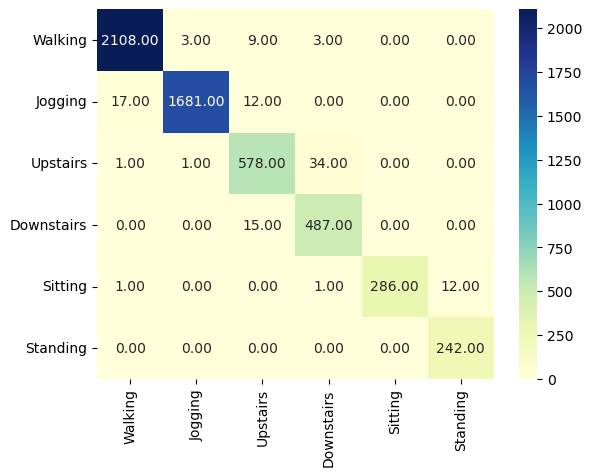

In [55]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [56]:
#64-64
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 194, 64)           1408      
                                                                 
 conv1d_29 (Conv1D)          (None, 188, 64)           28736     
                                                                 
 dropout_28 (Dropout)        (None, 188, 64)           0         
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 94, 64)           0         
 g1D)                                                            
                                                                 
 lstm_14 (LSTM)              (None, 90)                55800     
                                                                 
 dropout_29 (Dropout)        (None, 90)                0         
                                                     

In [57]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 21:28:21.001957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:28:21.253815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:28:22.087012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6786 - accuracy: 0.7697

2024-05-05 21:28:42.117155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:28:42.218741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 25s 73ms/step - loss: 0.6786 - accuracy: 0.7697 - val_loss: 0.4256 - val_accuracy: 0.8440
Epoch 2/20
275/275 [==============================] - 15s 55ms/step - loss: 0.3882 - accuracy: 0.8562 - val_loss: 0.3125 - val_accuracy: 0.8759
Epoch 3/20
275/275 [==============================] - 15s 54ms/step - loss: 0.2736 - accuracy: 0.8975 - val_loss: 0.4420 - val_accuracy: 0.8534
Epoch 4/20
275/275 [==============================] - 15s 54ms/step - loss: 0.2040 - accuracy: 0.9274 - val_loss: 0.1925 - val_accuracy: 0.9244
Epoch 5/20
275/275 [==============================] - 15s 54ms/step - loss: 0.1490 - accuracy: 0.9486 - val_loss: 0.2333 - val_accuracy: 0.9101
Epoch 6/20
275/275 [==============================] - 15s 53ms/step - loss: 0.1315 - accuracy: 0.9577 - val_loss: 0.1108 - val_accuracy: 0.9631
Epoch 7/20
275/275 [==============================] - 15s 55ms/step - loss: 0.1071 - accuracy: 0.9640 - val_loss: 0.1576 - val_accuracy: 0.9497
Epo

2024-05-05 21:33:29.299306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:33:29.379634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 22ms/step
f1_score =  0.9805973576153992
0.9805135676561646
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       1.00      0.99      0.99      1710
           2       0.88      0.99      0.93       614
           3       0.99      0.87      0.93       502
           4       0.99      0.99      0.99       300
           5       1.00      0.99      0.99       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

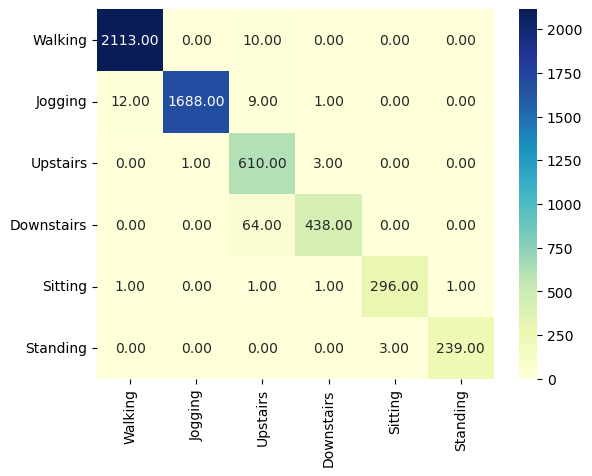

In [58]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [59]:
#64-64
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=128, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_30 (Conv1D)          (None, 194, 64)           1408      
                                                                 
 conv1d_31 (Conv1D)          (None, 188, 128)          57472     
                                                                 
 dropout_30 (Dropout)        (None, 188, 128)          0         
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 94, 128)          0         
 g1D)                                                            
                                                                 
 lstm_15 (LSTM)              (None, 90)                78840     
                                                                 
 dropout_31 (Dropout)        (None, 90)                0         
                                                     

In [60]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 21:34:30.525258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:34:30.739097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:34:31.457851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7409 - accuracy: 0.7489

2024-05-05 21:34:50.970825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:34:51.060869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 24s 72ms/step - loss: 0.7409 - accuracy: 0.7489 - val_loss: 0.4880 - val_accuracy: 0.8210
Epoch 2/20
275/275 [==============================] - 15s 53ms/step - loss: 0.3888 - accuracy: 0.8550 - val_loss: 0.2983 - val_accuracy: 0.8821
Epoch 3/20
275/275 [==============================] - 15s 56ms/step - loss: 0.2622 - accuracy: 0.9029 - val_loss: 0.2167 - val_accuracy: 0.9228
Epoch 4/20
275/275 [==============================] - 15s 54ms/step - loss: 0.1827 - accuracy: 0.9360 - val_loss: 0.1641 - val_accuracy: 0.9451
Epoch 5/20
275/275 [==============================] - 14s 52ms/step - loss: 0.1485 - accuracy: 0.9513 - val_loss: 0.1599 - val_accuracy: 0.9469
Epoch 6/20
275/275 [==============================] - 15s 53ms/step - loss: 0.1333 - accuracy: 0.9566 - val_loss: 0.1352 - val_accuracy: 0.9499
Epoch 7/20
275/275 [==============================] - 15s 53ms/step - loss: 0.1075 - accuracy: 0.9639 - val_loss: 0.1236 - val_accuracy: 0.9588
Epo

2024-05-05 21:46:53.592286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:46:53.702382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9766549763607825
0.9763248952831907
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2123
           1       1.00      1.00      1.00      1710
           2       0.96      0.91      0.93       614
           3       0.86      0.98      0.92       502
           4       1.00      0.95      0.97       300
           5       0.95      1.00      0.97       242

    accuracy                           0.98      5491
   macro avg       0.96      0.97      0.96      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

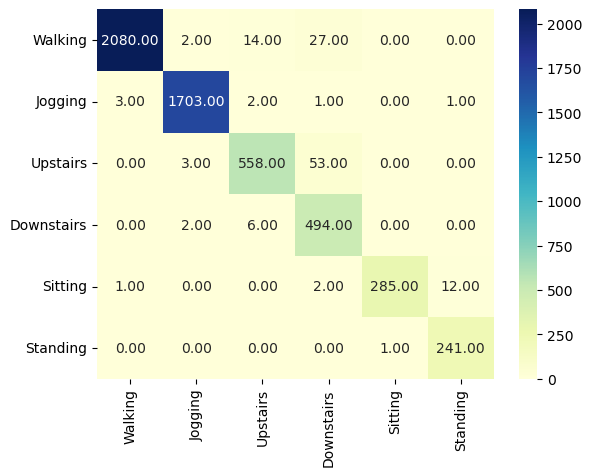

In [61]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [62]:
#64-256
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=256, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_32 (Conv1D)          (None, 194, 64)           1408      
                                                                 
 conv1d_33 (Conv1D)          (None, 188, 256)          114944    
                                                                 
 dropout_32 (Dropout)        (None, 188, 256)          0         
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 94, 256)          0         
 g1D)                                                            
                                                                 
 lstm_16 (LSTM)              (None, 90)                124920    
                                                                 
 dropout_33 (Dropout)        (None, 90)                0         
                                                     

In [63]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 21:48:19.219573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:48:19.438744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:48:20.150759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7358 - accuracy: 0.7523

2024-05-05 21:48:39.553070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 21:48:39.638402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 25s 72ms/step - loss: 0.7358 - accuracy: 0.7523 - val_loss: 0.5267 - val_accuracy: 0.8108
Epoch 2/20
275/275 [==============================] - 15s 54ms/step - loss: 0.4374 - accuracy: 0.8430 - val_loss: 0.3312 - val_accuracy: 0.8673
Epoch 3/20
275/275 [==============================] - 15s 54ms/step - loss: 0.2906 - accuracy: 0.8916 - val_loss: 0.2403 - val_accuracy: 0.9123
Epoch 4/20
275/275 [==============================] - 15s 54ms/step - loss: 0.2209 - accuracy: 0.9229 - val_loss: 0.2408 - val_accuracy: 0.9230
Epoch 5/20
275/275 [==============================] - 15s 54ms/step - loss: 0.1812 - accuracy: 0.9386 - val_loss: 0.1589 - val_accuracy: 0.9469
Epoch 6/20
275/275 [==============================] - 15s 53ms/step - loss: 0.1514 - accuracy: 0.9516 - val_loss: 0.1294 - val_accuracy: 0.9590
Epoch 7/20
275/275 [==============================] - 15s 53ms/step - loss: 0.1169 - accuracy: 0.9627 - val_loss: 0.1705 - val_accuracy: 0.9506
Epo

2024-05-05 22:41:13.952088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 22:41:14.061765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9826348556006458
0.9826989619377162
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       0.99      0.99      0.99      1710
           2       0.95      0.97      0.96       614
           3       0.97      0.92      0.95       502
           4       1.00      0.94      0.97       300
           5       0.95      1.00      0.97       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

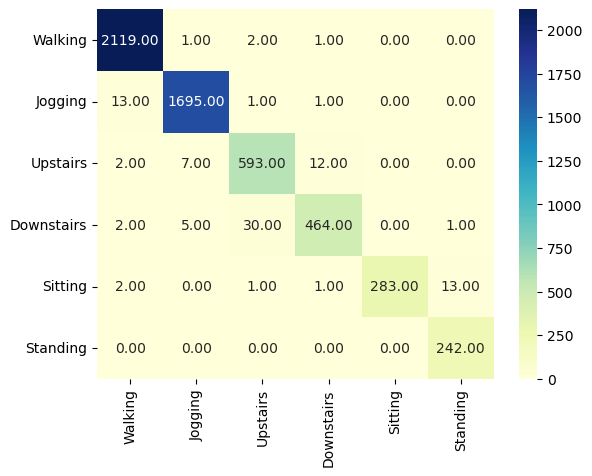

In [64]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [65]:
#64-256
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=512, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_34 (Conv1D)          (None, 194, 64)           1408      
                                                                 
 conv1d_35 (Conv1D)          (None, 188, 512)          229888    
                                                                 
 dropout_34 (Dropout)        (None, 188, 512)          0         
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 94, 512)          0         
 g1D)                                                            
                                                                 
 lstm_17 (LSTM)              (None, 90)                217080    
                                                                 
 dropout_35 (Dropout)        (None, 90)                0         
                                                     

In [66]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 22:42:03.920898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 22:42:04.141617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 22:42:04.940878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7663 - accuracy: 0.7400

2024-05-05 22:42:26.519964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 22:42:26.627753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 27s 79ms/step - loss: 0.7663 - accuracy: 0.7400 - val_loss: 0.5364 - val_accuracy: 0.8167
Epoch 2/20
275/275 [==============================] - 16s 58ms/step - loss: 0.5158 - accuracy: 0.8165 - val_loss: 0.4117 - val_accuracy: 0.8582
Epoch 3/20
275/275 [==============================] - 16s 58ms/step - loss: 0.3743 - accuracy: 0.8630 - val_loss: 0.2750 - val_accuracy: 0.8909
Epoch 4/20
275/275 [==============================] - 16s 59ms/step - loss: 0.2677 - accuracy: 0.9020 - val_loss: 0.2290 - val_accuracy: 0.9194
Epoch 5/20
275/275 [==============================] - 16s 59ms/step - loss: 0.2127 - accuracy: 0.9253 - val_loss: 0.1732 - val_accuracy: 0.9426
Epoch 6/20
275/275 [==============================] - 16s 59ms/step - loss: 0.1774 - accuracy: 0.9378 - val_loss: 0.1661 - val_accuracy: 0.9438
Epoch 7/20
275/275 [==============================] - 16s 59ms/step - loss: 0.1525 - accuracy: 0.9482 - val_loss: 0.1271 - val_accuracy: 0.9624
Epo

2024-05-05 22:47:53.070510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 22:47:53.163056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9828632416323566
0.9828810781278455
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       1.00      0.99      0.99      1710
           2       0.93      0.98      0.95       614
           3       0.98      0.92      0.95       502
           4       1.00      0.95      0.97       300
           5       0.95      1.00      0.97       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

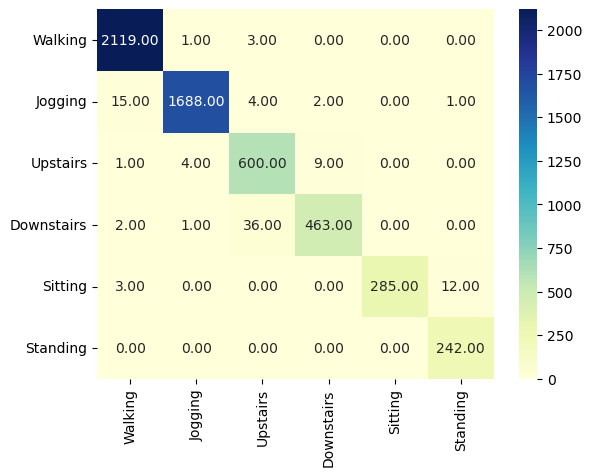

In [67]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# filter_size_tuning_Conv1-128

In [68]:
#128-16
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=16, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 194, 128)          2816      
                                                                 
 conv1d_37 (Conv1D)          (None, 188, 16)           14352     
                                                                 
 dropout_36 (Dropout)        (None, 188, 16)           0         
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 94, 16)           0         
 g1D)                                                            
                                                                 
 lstm_18 (LSTM)              (None, 90)                38520     
                                                                 
 dropout_37 (Dropout)        (None, 90)                0         
                                                     

In [69]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 22:50:07.251585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 22:50:07.450612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 22:50:08.109187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7017 - accuracy: 0.7585

2024-05-05 22:50:27.307541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 22:50:27.421789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 24s 72ms/step - loss: 0.7017 - accuracy: 0.7585 - val_loss: 0.4868 - val_accuracy: 0.8163
Epoch 2/20
275/275 [==============================] - 15s 54ms/step - loss: 0.4454 - accuracy: 0.8385 - val_loss: 0.5132 - val_accuracy: 0.7898
Epoch 3/20
275/275 [==============================] - 14s 52ms/step - loss: 0.3309 - accuracy: 0.8740 - val_loss: 0.2825 - val_accuracy: 0.8909
Epoch 4/20
275/275 [==============================] - 15s 53ms/step - loss: 0.2488 - accuracy: 0.9056 - val_loss: 0.2888 - val_accuracy: 0.8900
Epoch 5/20
275/275 [==============================] - 15s 54ms/step - loss: 0.1808 - accuracy: 0.9350 - val_loss: 0.1796 - val_accuracy: 0.9369
Epoch 6/20
275/275 [==============================] - 15s 54ms/step - loss: 0.1722 - accuracy: 0.9408 - val_loss: 0.1708 - val_accuracy: 0.9517
Epoch 7/20
275/275 [==============================] - 15s 54ms/step - loss: 0.1523 - accuracy: 0.9493 - val_loss: 0.4224 - val_accuracy: 0.8370
Epo

2024-05-05 22:55:47.368725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 22:55:47.453739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9564819748034674
0.9555636496084502
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.92      0.95      1710
           2       0.82      0.94      0.88       614
           3       0.87      0.96      0.91       502
           4       1.00      0.93      0.96       300
           5       0.92      1.00      0.96       242

    accuracy                           0.96      5491
   macro avg       0.93      0.96      0.94      5491
weighted avg       0.96      0.96      0.96      5491



<Axes: >

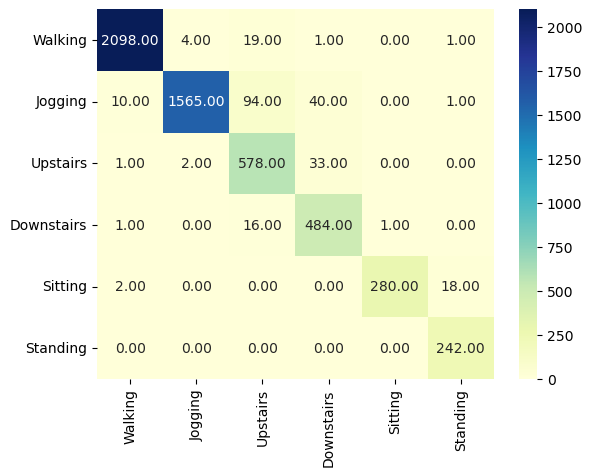

In [70]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [71]:
#128-32
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_38 (Conv1D)          (None, 194, 128)          2816      
                                                                 
 conv1d_39 (Conv1D)          (None, 188, 32)           28704     
                                                                 
 dropout_38 (Dropout)        (None, 188, 32)           0         
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 94, 32)           0         
 g1D)                                                            
                                                                 
 lstm_19 (LSTM)              (None, 90)                44280     
                                                                 
 dropout_39 (Dropout)        (None, 90)                0         
                                                     

In [72]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 22:58:19.798669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 22:58:20.052338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 22:58:20.816352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7132 - accuracy: 0.7548

2024-05-05 22:58:39.290001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 22:58:39.384246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 24s 68ms/step - loss: 0.7132 - accuracy: 0.7548 - val_loss: 0.4812 - val_accuracy: 0.8331
Epoch 2/20
275/275 [==============================] - 14s 52ms/step - loss: 0.3977 - accuracy: 0.8578 - val_loss: 0.3655 - val_accuracy: 0.8670
Epoch 3/20
275/275 [==============================] - 14s 52ms/step - loss: 0.2872 - accuracy: 0.8994 - val_loss: 0.4195 - val_accuracy: 0.8452
Epoch 4/20
275/275 [==============================] - 14s 51ms/step - loss: 0.2245 - accuracy: 0.9231 - val_loss: 0.2101 - val_accuracy: 0.9210
Epoch 5/20
275/275 [==============================] - 14s 52ms/step - loss: 0.1786 - accuracy: 0.9388 - val_loss: 0.1943 - val_accuracy: 0.9283
Epoch 6/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1548 - accuracy: 0.9477 - val_loss: 0.1841 - val_accuracy: 0.9401
Epoch 7/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1223 - accuracy: 0.9603 - val_loss: 0.1264 - val_accuracy: 0.9554
Epo

2024-05-05 23:06:33.660448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:06:33.759663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9722893334081005
0.9721362229102167
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2123
           1       1.00      0.98      0.99      1710
           2       0.92      0.90      0.91       614
           3       0.88      0.97      0.93       502
           4       0.91      0.98      0.94       300
           5       1.00      0.88      0.93       242

    accuracy                           0.97      5491
   macro avg       0.95      0.95      0.95      5491
weighted avg       0.97      0.97      0.97      5491



<Axes: >

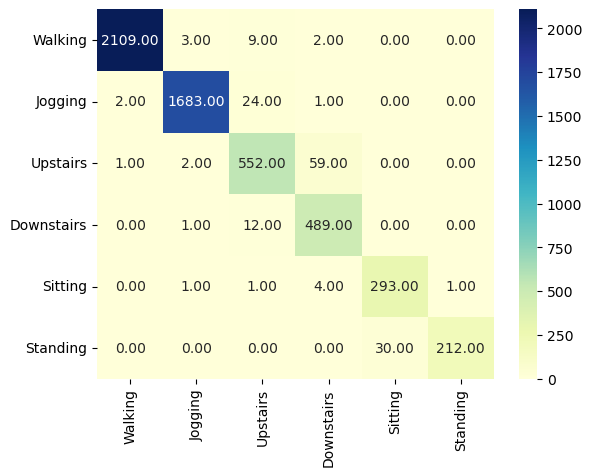

In [73]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [74]:
#128-64
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_40 (Conv1D)          (None, 194, 128)          2816      
                                                                 
 conv1d_41 (Conv1D)          (None, 188, 64)           57408     
                                                                 
 dropout_40 (Dropout)        (None, 188, 64)           0         
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 94, 64)           0         
 g1D)                                                            
                                                                 
 lstm_20 (LSTM)              (None, 90)                55800     
                                                                 
 dropout_41 (Dropout)        (None, 90)                0         
                                                     

In [75]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 23:07:49.132888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:07:49.361965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:07:50.140314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6520 - accuracy: 0.7754

2024-05-05 23:08:09.621363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:08:09.725864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 24s 72ms/step - loss: 0.6520 - accuracy: 0.7754 - val_loss: 0.3964 - val_accuracy: 0.8459
Epoch 2/20
275/275 [==============================] - 14s 53ms/step - loss: 0.3267 - accuracy: 0.8819 - val_loss: 0.4296 - val_accuracy: 0.8472
Epoch 3/20
275/275 [==============================] - 14s 52ms/step - loss: 0.2507 - accuracy: 0.9120 - val_loss: 0.2589 - val_accuracy: 0.8823
Epoch 4/20
275/275 [==============================] - 14s 52ms/step - loss: 0.1947 - accuracy: 0.9332 - val_loss: 0.1918 - val_accuracy: 0.9321
Epoch 5/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1457 - accuracy: 0.9525 - val_loss: 0.2377 - val_accuracy: 0.9203
Epoch 6/20
275/275 [==============================] - 14s 52ms/step - loss: 0.1209 - accuracy: 0.9603 - val_loss: 0.1041 - val_accuracy: 0.9656
Epoch 7/20
275/275 [==============================] - 14s 52ms/step - loss: 0.0968 - accuracy: 0.9683 - val_loss: 0.1731 - val_accuracy: 0.9399
Epo

2024-05-05 23:14:24.517401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:14:24.588244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9839370995552073
0.9839737752686214
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       0.99      0.99      0.99      1710
           2       0.95      0.96      0.96       614
           3       0.97      0.95      0.96       502
           4       0.99      0.94      0.97       300
           5       0.95      1.00      0.97       242

    accuracy                           0.98      5491
   macro avg       0.98      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

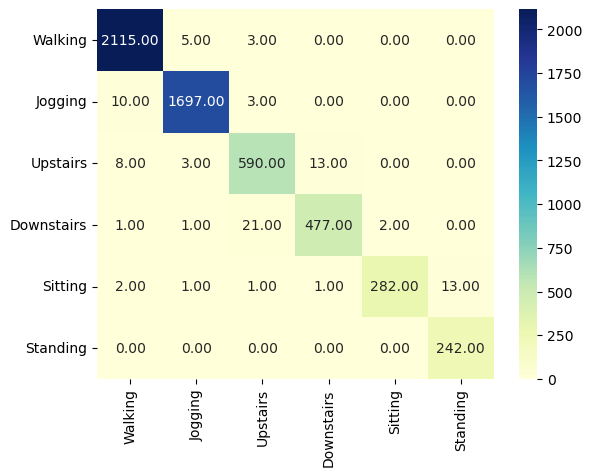

In [76]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [11]:
#128-128
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=128, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Metal device set to: Apple M2 Pro


2024-05-05 23:26:37.961330: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-05 23:26:37.961648: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 194, 128)          2816      
                                                                 
 conv1d_1 (Conv1D)           (None, 188, 128)          114816    
                                                                 
 dropout (Dropout)           (None, 188, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 94, 128)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 90)                78840     
                                                                 
 dropout_1 (Dropout)         (None, 90)                0         
                                                        

In [12]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 23:26:40.250475: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-05 23:26:41.075535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:26:41.278656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:26:42.028449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7233 - accuracy: 0.7527

2024-05-05 23:26:59.892300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:26:59.970534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 22s 64ms/step - loss: 0.7233 - accuracy: 0.7527 - val_loss: 0.4796 - val_accuracy: 0.8242
Epoch 2/20
275/275 [==============================] - 13s 47ms/step - loss: 0.3997 - accuracy: 0.8471 - val_loss: 0.3281 - val_accuracy: 0.8814
Epoch 3/20
275/275 [==============================] - 13s 48ms/step - loss: 0.2553 - accuracy: 0.9080 - val_loss: 0.1895 - val_accuracy: 0.9388
Epoch 4/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1907 - accuracy: 0.9350 - val_loss: 0.2516 - val_accuracy: 0.9192
Epoch 5/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1561 - accuracy: 0.9484 - val_loss: 0.3045 - val_accuracy: 0.9271
Epoch 6/20
275/275 [==============================] - 13s 49ms/step - loss: 0.1411 - accuracy: 0.9538 - val_loss: 0.1001 - val_accuracy: 0.9629
Epoch 7/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1116 - accuracy: 0.9639 - val_loss: 0.1040 - val_accuracy: 0.9643
Epo

2024-05-05 23:45:36.137905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:45:36.212312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9857888801599424
0.9857949371699144
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2123
           1       1.00      0.99      0.99      1710
           2       0.93      0.99      0.96       614
           3       0.98      0.92      0.95       502
           4       1.00      0.98      0.99       300
           5       0.98      0.98      0.98       242

    accuracy                           0.99      5491
   macro avg       0.98      0.98      0.98      5491
weighted avg       0.99      0.99      0.99      5491



<Axes: >

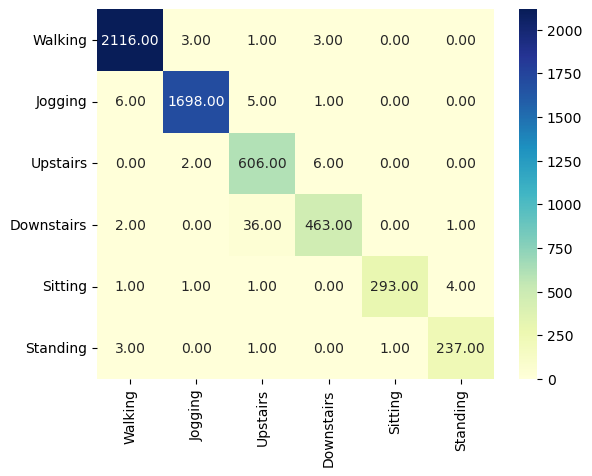

In [13]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [15]:
#128-256
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=256, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 194, 128)          2816      
                                                                 
 conv1d_5 (Conv1D)           (None, 188, 256)          229632    
                                                                 
 dropout_4 (Dropout)         (None, 188, 256)          0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 94, 256)          0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 90)                124920    
                                                                 
 dropout_5 (Dropout)         (None, 90)                0         
                                                      

In [16]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 23:46:59.793411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:46:59.977548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:47:00.613165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7412 - accuracy: 0.7446

2024-05-05 23:47:20.294830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:47:20.371504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 24s 71ms/step - loss: 0.7412 - accuracy: 0.7446 - val_loss: 0.4222 - val_accuracy: 0.8304
Epoch 2/20
275/275 [==============================] - 15s 53ms/step - loss: 0.4073 - accuracy: 0.8459 - val_loss: 0.3955 - val_accuracy: 0.8684
Epoch 3/20
275/275 [==============================] - 15s 53ms/step - loss: 0.2803 - accuracy: 0.8959 - val_loss: 0.5058 - val_accuracy: 0.8349
Epoch 4/20
275/275 [==============================] - 16s 56ms/step - loss: 0.2447 - accuracy: 0.9116 - val_loss: 0.2056 - val_accuracy: 0.9255
Epoch 5/20
275/275 [==============================] - 15s 56ms/step - loss: 0.1894 - accuracy: 0.9349 - val_loss: 0.1165 - val_accuracy: 0.9649
Epoch 6/20
275/275 [==============================] - 15s 54ms/step - loss: 0.1801 - accuracy: 0.9399 - val_loss: 0.1178 - val_accuracy: 0.9620
Epoch 7/20
275/275 [==============================] - 15s 56ms/step - loss: 0.1407 - accuracy: 0.9531 - val_loss: 0.1247 - val_accuracy: 0.9613
Epo

2024-05-05 23:53:01.557432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:53:01.623939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9845464297086066
0.9845201238390093
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2123
           1       1.00      0.99      0.99      1710
           2       0.94      0.97      0.96       614
           3       0.95      0.94      0.95       502
           4       1.00      0.96      0.98       300
           5       0.96      0.98      0.97       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

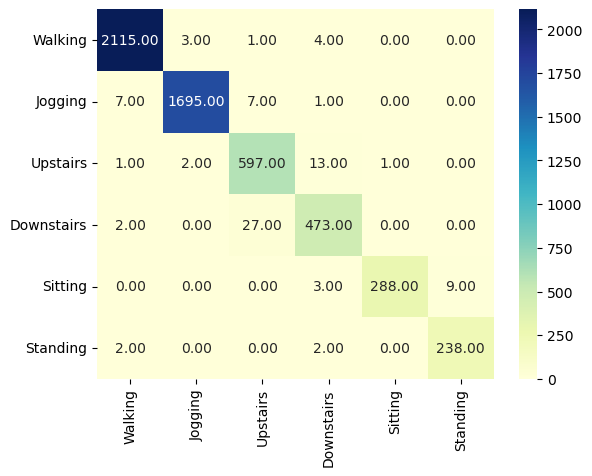

In [17]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [18]:
#128-256
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=512, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 194, 128)          2816      
                                                                 
 conv1d_7 (Conv1D)           (None, 188, 512)          459264    
                                                                 
 dropout_6 (Dropout)         (None, 188, 512)          0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 94, 512)          0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 90)                217080    
                                                                 
 dropout_7 (Dropout)         (None, 90)                0         
                                                      

In [19]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 23:53:29.144715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:53:29.336109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:53:29.997794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7739 - accuracy: 0.7403

2024-05-05 23:53:49.407057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:53:49.485518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 24s 71ms/step - loss: 0.7739 - accuracy: 0.7403 - val_loss: 0.4957 - val_accuracy: 0.8251
Epoch 2/20
275/275 [==============================] - 15s 56ms/step - loss: 0.4200 - accuracy: 0.8454 - val_loss: 0.4364 - val_accuracy: 0.8365
Epoch 3/20
275/275 [==============================] - 15s 55ms/step - loss: 0.2920 - accuracy: 0.8887 - val_loss: 0.2682 - val_accuracy: 0.8846
Epoch 4/20
275/275 [==============================] - 15s 55ms/step - loss: 0.2371 - accuracy: 0.9179 - val_loss: 0.2283 - val_accuracy: 0.9180
Epoch 5/20
275/275 [==============================] - 16s 57ms/step - loss: 0.1871 - accuracy: 0.9390 - val_loss: 0.1851 - val_accuracy: 0.9399
Epoch 6/20
275/275 [==============================] - 16s 57ms/step - loss: 0.1419 - accuracy: 0.9539 - val_loss: 0.1612 - val_accuracy: 0.9442
Epoch 7/20
275/275 [==============================] - 16s 59ms/step - loss: 0.1379 - accuracy: 0.9530 - val_loss: 0.0829 - val_accuracy: 0.9706
Epo

2024-05-05 23:59:07.860454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:59:07.925215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.982923757600448
0.9828810781278455
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.99      1.00      1710
           2       0.95      0.95      0.95       614
           3       0.93      0.96      0.95       502
           4       0.97      0.98      0.98       300
           5       0.99      0.94      0.96       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

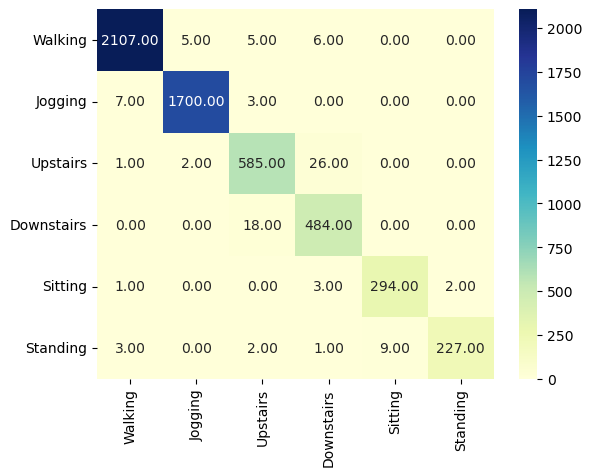

In [20]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# filter_size_tuning_Conv1-256

In [21]:
#256-16
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=16, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 194, 256)          5632      
                                                                 
 conv1d_9 (Conv1D)           (None, 188, 16)           28688     
                                                                 
 dropout_8 (Dropout)         (None, 188, 16)           0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 94, 16)           0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 90)                38520     
                                                                 
 dropout_9 (Dropout)         (None, 90)                0         
                                                      

In [22]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 23:59:49.432370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:59:49.626479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 23:59:50.291041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6672 - accuracy: 0.7728

2024-05-06 00:00:07.918663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:00:07.996642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 22s 64ms/step - loss: 0.6672 - accuracy: 0.7728 - val_loss: 0.5927 - val_accuracy: 0.7794
Epoch 2/20
275/275 [==============================] - 13s 47ms/step - loss: 0.3724 - accuracy: 0.8591 - val_loss: 0.6190 - val_accuracy: 0.7527
Epoch 3/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2918 - accuracy: 0.8925 - val_loss: 0.2512 - val_accuracy: 0.8998
Epoch 4/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2345 - accuracy: 0.9181 - val_loss: 0.2923 - val_accuracy: 0.8798
Epoch 5/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1899 - accuracy: 0.9380 - val_loss: 0.2327 - val_accuracy: 0.9219
Epoch 6/20
275/275 [==============================] - 14s 50ms/step - loss: 0.1871 - accuracy: 0.9405 - val_loss: 0.3214 - val_accuracy: 0.8909
Epoch 7/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1601 - accuracy: 0.9492 - val_loss: 0.2599 - val_accuracy: 0.9155
Epo

2024-05-06 00:05:29.113313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:05:29.182026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 21ms/step
f1_score =  0.95836678334397
0.9579311600801311
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2123
           1       1.00      0.95      0.97      1710
           2       0.87      0.86      0.86       614
           3       0.84      0.98      0.90       502
           4       1.00      0.93      0.96       300
           5       0.93      0.99      0.96       242

    accuracy                           0.96      5491
   macro avg       0.94      0.95      0.94      5491
weighted avg       0.96      0.96      0.96      5491



<Axes: >

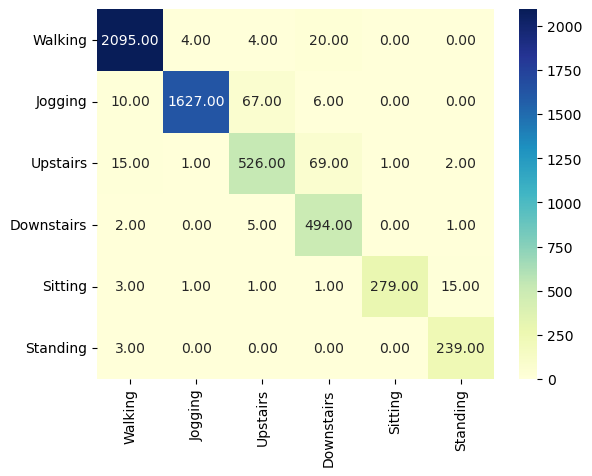

In [23]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [24]:
#256-32
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 194, 256)          5632      
                                                                 
 conv1d_11 (Conv1D)          (None, 188, 32)           57376     
                                                                 
 dropout_10 (Dropout)        (None, 188, 32)           0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 94, 32)           0         
 1D)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 90)                44280     
                                                                 
 dropout_11 (Dropout)        (None, 90)                0         
                                                      

In [25]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 00:06:06.293787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:06:06.486910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:06:07.142634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6995 - accuracy: 0.7580

2024-05-06 00:06:25.519185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:06:25.605227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 67ms/step - loss: 0.6995 - accuracy: 0.7580 - val_loss: 0.5558 - val_accuracy: 0.7962
Epoch 2/20
275/275 [==============================] - 13s 49ms/step - loss: 0.4163 - accuracy: 0.8506 - val_loss: 0.4110 - val_accuracy: 0.8367
Epoch 3/20
275/275 [==============================] - 14s 49ms/step - loss: 0.2860 - accuracy: 0.8989 - val_loss: 0.2386 - val_accuracy: 0.9201
Epoch 4/20
275/275 [==============================] - 13s 48ms/step - loss: 0.2132 - accuracy: 0.9261 - val_loss: 0.2748 - val_accuracy: 0.9014
Epoch 5/20
275/275 [==============================] - 13s 49ms/step - loss: 0.1884 - accuracy: 0.9359 - val_loss: 0.1507 - val_accuracy: 0.9510
Epoch 6/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1437 - accuracy: 0.9506 - val_loss: 0.1764 - val_accuracy: 0.9374
Epoch 7/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1531 - accuracy: 0.9505 - val_loss: 0.1569 - val_accuracy: 0.9469
Epo

2024-05-06 00:11:04.580777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:11:04.649522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 23ms/step
f1_score =  0.977490485017692
0.9774175924239665
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       0.99      0.99      0.99      1710
           2       0.93      0.96      0.94       614
           3       0.94      0.95      0.94       502
           4       1.00      0.91      0.95       300
           5       0.93      0.98      0.95       242

    accuracy                           0.98      5491
   macro avg       0.96      0.96      0.96      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

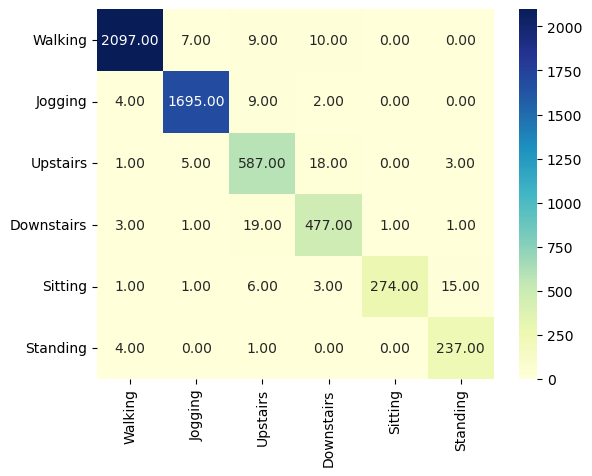

In [26]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [27]:
#256-64
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 194, 256)          5632      
                                                                 
 conv1d_13 (Conv1D)          (None, 188, 64)           114752    
                                                                 
 dropout_12 (Dropout)        (None, 188, 64)           0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 94, 64)           0         
 1D)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_13 (Dropout)        (None, 90)                0         
                                                      

In [28]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 00:11:51.298179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:11:51.492209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:11:52.221853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6950 - accuracy: 0.7651

2024-05-06 00:12:11.848201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:12:11.932058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 25s 72ms/step - loss: 0.6950 - accuracy: 0.7651 - val_loss: 0.4647 - val_accuracy: 0.8331
Epoch 2/20
275/275 [==============================] - 15s 53ms/step - loss: 0.3781 - accuracy: 0.8624 - val_loss: 0.2778 - val_accuracy: 0.8998
Epoch 3/20
275/275 [==============================] - 15s 54ms/step - loss: 0.2534 - accuracy: 0.9132 - val_loss: 0.2635 - val_accuracy: 0.9142
Epoch 4/20
275/275 [==============================] - 15s 54ms/step - loss: 0.2007 - accuracy: 0.9329 - val_loss: 0.1933 - val_accuracy: 0.9328
Epoch 5/20
275/275 [==============================] - 14s 52ms/step - loss: 0.1670 - accuracy: 0.9446 - val_loss: 0.1415 - val_accuracy: 0.9540
Epoch 6/20
275/275 [==============================] - 15s 53ms/step - loss: 0.1481 - accuracy: 0.9527 - val_loss: 0.1418 - val_accuracy: 0.9520
Epoch 7/20
275/275 [==============================] - 15s 54ms/step - loss: 0.1180 - accuracy: 0.9630 - val_loss: 0.1887 - val_accuracy: 0.9214
Epo

2024-05-06 00:17:20.355318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:17:20.435223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9784356943927167
0.978328173374613
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       0.99      0.99      0.99      1710
           2       0.97      0.91      0.94       614
           3       0.89      0.98      0.93       502
           4       0.98      0.98      0.98       300
           5       0.98      0.96      0.97       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

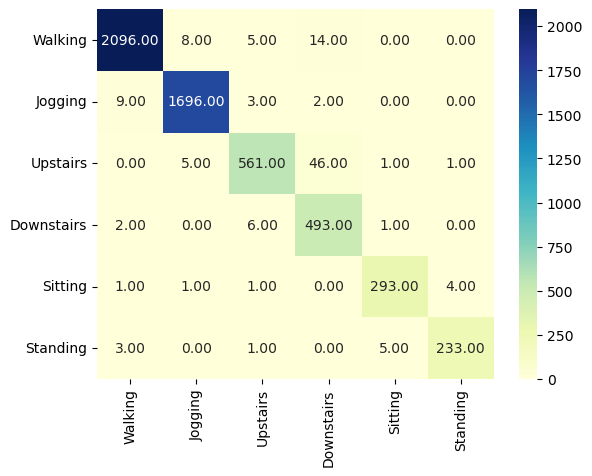

In [29]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [30]:
#256-64
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 194, 256)          5632      
                                                                 
 conv1d_15 (Conv1D)          (None, 188, 64)           114752    
                                                                 
 dropout_14 (Dropout)        (None, 188, 64)           0         
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 94, 64)           0         
 1D)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_15 (Dropout)        (None, 90)                0         
                                                      

In [31]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 00:17:50.652726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:17:50.857835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:17:51.528149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7011 - accuracy: 0.7616

2024-05-06 00:18:09.843922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:18:09.933068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 67ms/step - loss: 0.7011 - accuracy: 0.7616 - val_loss: 0.4759 - val_accuracy: 0.8240
Epoch 2/20
275/275 [==============================] - 14s 49ms/step - loss: 0.4003 - accuracy: 0.8531 - val_loss: 0.3765 - val_accuracy: 0.8577
Epoch 3/20
275/275 [==============================] - 14s 49ms/step - loss: 0.2686 - accuracy: 0.9082 - val_loss: 0.4292 - val_accuracy: 0.8934
Epoch 4/20
275/275 [==============================] - 15s 53ms/step - loss: 0.2273 - accuracy: 0.9264 - val_loss: 0.1694 - val_accuracy: 0.9394
Epoch 5/20
275/275 [==============================] - 15s 53ms/step - loss: 0.1727 - accuracy: 0.9438 - val_loss: 0.1674 - val_accuracy: 0.9433
Epoch 6/20
275/275 [==============================] - 14s 52ms/step - loss: 0.1495 - accuracy: 0.9503 - val_loss: 0.1454 - val_accuracy: 0.9501
Epoch 7/20
275/275 [==============================] - 15s 54ms/step - loss: 0.1443 - accuracy: 0.9533 - val_loss: 0.1457 - val_accuracy: 0.9542
Epo

2024-05-06 00:23:07.317013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:23:07.391867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9792287711396623
0.9790566381351302
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2123
           1       1.00      1.00      1.00      1710
           2       0.91      0.96      0.93       614
           3       0.95      0.95      0.95       502
           4       0.99      0.98      0.98       300
           5       0.94      0.98      0.96       242

    accuracy                           0.98      5491
   macro avg       0.96      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

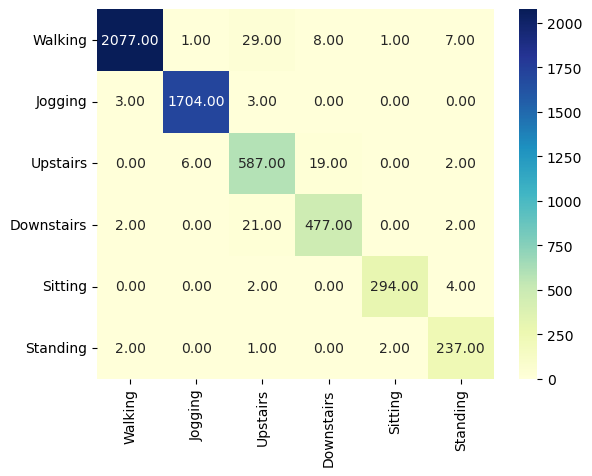

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [33]:
#256-128
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=128, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 194, 256)          5632      
                                                                 
 conv1d_17 (Conv1D)          (None, 188, 128)          229504    
                                                                 
 dropout_16 (Dropout)        (None, 188, 128)          0         
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 94, 128)          0         
 1D)                                                             
                                                                 
 lstm_8 (LSTM)               (None, 90)                78840     
                                                                 
 dropout_17 (Dropout)        (None, 90)                0         
                                                      

In [34]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 00:23:50.796537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:23:50.998324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:23:51.726630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7717 - accuracy: 0.7375

2024-05-06 00:24:11.851875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:24:11.938343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 25s 73ms/step - loss: 0.7717 - accuracy: 0.7375 - val_loss: 0.4468 - val_accuracy: 0.8381
Epoch 2/20
275/275 [==============================] - 15s 56ms/step - loss: 0.4243 - accuracy: 0.8485 - val_loss: 0.3087 - val_accuracy: 0.8878
Epoch 3/20
275/275 [==============================] - 15s 54ms/step - loss: 0.2999 - accuracy: 0.8917 - val_loss: 0.2458 - val_accuracy: 0.9130
Epoch 4/20
275/275 [==============================] - 15s 54ms/step - loss: 0.2205 - accuracy: 0.9262 - val_loss: 0.2408 - val_accuracy: 0.9226
Epoch 5/20
275/275 [==============================] - 15s 54ms/step - loss: 0.1956 - accuracy: 0.9339 - val_loss: 0.1517 - val_accuracy: 0.9506
Epoch 6/20
275/275 [==============================] - 15s 54ms/step - loss: 0.1720 - accuracy: 0.9458 - val_loss: 0.1290 - val_accuracy: 0.9590
Epoch 7/20
275/275 [==============================] - 15s 55ms/step - loss: 0.1414 - accuracy: 0.9553 - val_loss: 0.1027 - val_accuracy: 0.9677
Epo

2024-05-06 00:29:05.615328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:29:05.694191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 21ms/step
f1_score =  0.9841951036673694
0.9841558914587507
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       1.00      0.99      0.99      1710
           2       0.96      0.96      0.96       614
           3       0.94      0.96      0.95       502
           4       0.99      0.96      0.97       300
           5       0.96      0.98      0.97       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

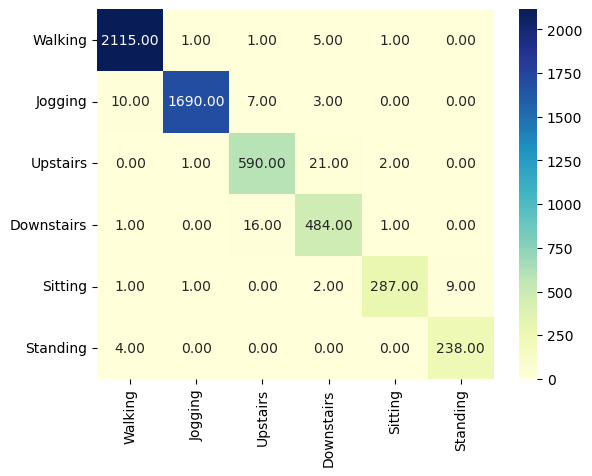

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [36]:
#256-256
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=256, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 194, 256)          5632      
                                                                 
 conv1d_19 (Conv1D)          (None, 188, 256)          459008    
                                                                 
 dropout_18 (Dropout)        (None, 188, 256)          0         
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 94, 256)          0         
 1D)                                                             
                                                                 
 lstm_9 (LSTM)               (None, 90)                124920    
                                                                 
 dropout_19 (Dropout)        (None, 90)                0         
                                                      

In [37]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 00:29:12.982019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:29:13.177890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:29:13.839183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7780 - accuracy: 0.7356

2024-05-06 00:29:35.246140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:29:35.337386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 26s 78ms/step - loss: 0.7780 - accuracy: 0.7356 - val_loss: 0.5582 - val_accuracy: 0.7728
Epoch 2/20
275/275 [==============================] - 16s 58ms/step - loss: 0.4480 - accuracy: 0.8358 - val_loss: 0.3143 - val_accuracy: 0.8866
Epoch 3/20
275/275 [==============================] - 16s 59ms/step - loss: 0.3254 - accuracy: 0.8781 - val_loss: 0.2674 - val_accuracy: 0.9003
Epoch 4/20
275/275 [==============================] - 16s 59ms/step - loss: 0.2542 - accuracy: 0.9058 - val_loss: 0.1777 - val_accuracy: 0.9374
Epoch 5/20
275/275 [==============================] - 16s 59ms/step - loss: 0.1977 - accuracy: 0.9314 - val_loss: 0.1365 - val_accuracy: 0.9556
Epoch 6/20
275/275 [==============================] - 16s 59ms/step - loss: 0.1817 - accuracy: 0.9413 - val_loss: 0.1638 - val_accuracy: 0.9394
Epoch 7/20
275/275 [==============================] - 16s 59ms/step - loss: 0.1331 - accuracy: 0.9573 - val_loss: 0.1019 - val_accuracy: 0.9636
Epo

2024-05-06 00:35:49.240209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:35:49.322253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 21ms/step
f1_score =  0.9806564197132082
0.9805135676561646
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       1.00      0.97      0.99      1710
           2       0.93      0.96      0.95       614
           3       0.93      0.96      0.94       502
           4       0.99      0.99      0.99       300
           5       0.98      0.98      0.98       242

    accuracy                           0.98      5491
   macro avg       0.97      0.98      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

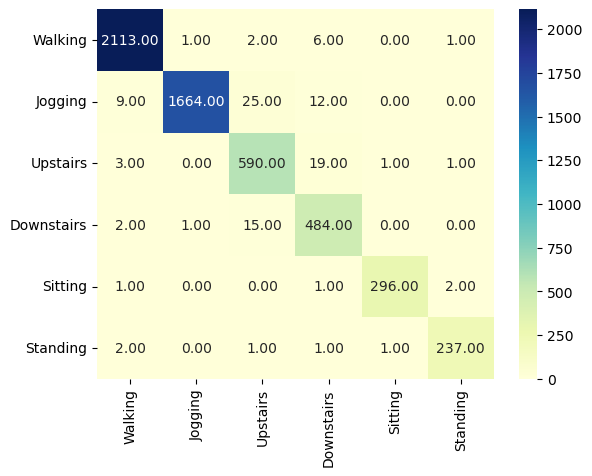

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [42]:
#256-512
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=512, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 194, 256)          5632      
                                                                 
 conv1d_23 (Conv1D)          (None, 188, 512)          918016    
                                                                 
 dropout_22 (Dropout)        (None, 188, 512)          0         
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 94, 512)          0         
 g1D)                                                            
                                                                 
 lstm_11 (LSTM)              (None, 90)                217080    
                                                                 
 dropout_23 (Dropout)        (None, 90)                0         
                                                     

In [43]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 00:48:24.933534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:48:25.137849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:48:25.880694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7977 - accuracy: 0.7318

2024-05-06 00:48:47.436155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:48:47.525811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 27s 78ms/step - loss: 0.7977 - accuracy: 0.7318 - val_loss: 0.5282 - val_accuracy: 0.8049
Epoch 2/20
275/275 [==============================] - 17s 62ms/step - loss: 0.4683 - accuracy: 0.8276 - val_loss: 0.3565 - val_accuracy: 0.8556
Epoch 3/20
275/275 [==============================] - 17s 62ms/step - loss: 0.3734 - accuracy: 0.8599 - val_loss: 0.2805 - val_accuracy: 0.8998
Epoch 4/20
275/275 [==============================] - 17s 62ms/step - loss: 0.2993 - accuracy: 0.8870 - val_loss: 0.2938 - val_accuracy: 0.8891
Epoch 5/20
275/275 [==============================] - 17s 63ms/step - loss: 0.2470 - accuracy: 0.9074 - val_loss: 0.1848 - val_accuracy: 0.9292
Epoch 6/20
275/275 [==============================] - 17s 63ms/step - loss: 0.1980 - accuracy: 0.9296 - val_loss: 0.1604 - val_accuracy: 0.9417
Epoch 7/20
275/275 [==============================] - 17s 63ms/step - loss: 0.1677 - accuracy: 0.9448 - val_loss: 0.1098 - val_accuracy: 0.9636
Epo

2024-05-06 00:54:22.724179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:54:22.799890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 21ms/step
f1_score =  0.9852491421775862
0.9852485885995265
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       1.00      0.99      1.00      1710
           2       0.96      0.97      0.96       614
           3       0.96      0.94      0.95       502
           4       0.98      0.97      0.97       300
           5       0.98      0.98      0.98       242

    accuracy                           0.99      5491
   macro avg       0.98      0.98      0.98      5491
weighted avg       0.99      0.99      0.99      5491



<Axes: >

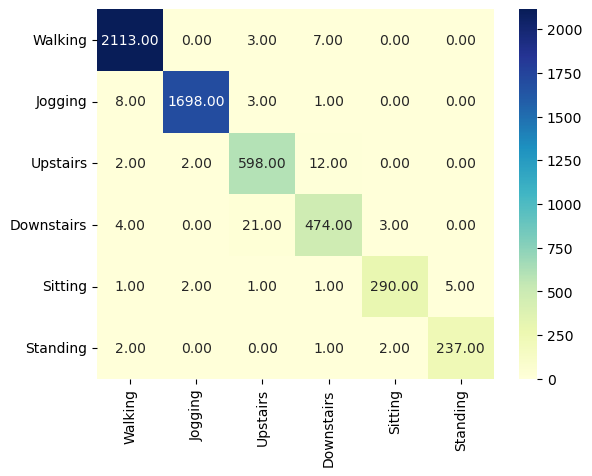

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# filter_size_tuning_Conv1-512

In [45]:
#512-16
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=512, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=16, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 194, 512)          11264     
                                                                 
 conv1d_25 (Conv1D)          (None, 188, 16)           57360     
                                                                 
 dropout_24 (Dropout)        (None, 188, 16)           0         
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 94, 16)           0         
 g1D)                                                            
                                                                 
 lstm_12 (LSTM)              (None, 90)                38520     
                                                                 
 dropout_25 (Dropout)        (None, 90)                0         
                                                     

In [46]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 00:55:32.264879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:55:32.466001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:55:33.147467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6945 - accuracy: 0.7646

2024-05-06 00:55:54.346244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:55:54.443682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 26s 78ms/step - loss: 0.6945 - accuracy: 0.7646 - val_loss: 0.5347 - val_accuracy: 0.7996
Epoch 2/20
275/275 [==============================] - 15s 56ms/step - loss: 0.4287 - accuracy: 0.8440 - val_loss: 0.3969 - val_accuracy: 0.8393
Epoch 3/20
275/275 [==============================] - 16s 57ms/step - loss: 0.3118 - accuracy: 0.8895 - val_loss: 0.3375 - val_accuracy: 0.8588
Epoch 4/20
275/275 [==============================] - 16s 57ms/step - loss: 0.2525 - accuracy: 0.9140 - val_loss: 0.2935 - val_accuracy: 0.9010
Epoch 5/20
275/275 [==============================] - 16s 58ms/step - loss: 0.2303 - accuracy: 0.9225 - val_loss: 0.3003 - val_accuracy: 0.8966
Epoch 6/20
275/275 [==============================] - 15s 55ms/step - loss: 0.1968 - accuracy: 0.9341 - val_loss: 0.3411 - val_accuracy: 0.8830
Epoch 7/20
275/275 [==============================] - 15s 55ms/step - loss: 0.1723 - accuracy: 0.9407 - val_loss: 0.2145 - val_accuracy: 0.9265
Epo

2024-05-06 01:01:07.071416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:01:07.153676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 22ms/step
f1_score =  0.9554617186122629
0.9550173010380623
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.96      0.74      0.84       614
           3       0.73      0.98      0.84       502
           4       1.00      0.95      0.97       300
           5       0.96      0.99      0.97       242

    accuracy                           0.96      5491
   macro avg       0.94      0.94      0.93      5491
weighted avg       0.96      0.96      0.96      5491



<Axes: >

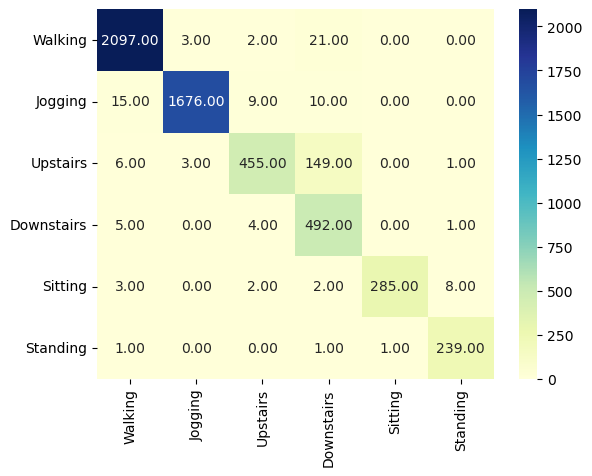

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [48]:
#512-32
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=512, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 194, 512)          11264     
                                                                 
 conv1d_27 (Conv1D)          (None, 188, 32)           114720    
                                                                 
 dropout_26 (Dropout)        (None, 188, 32)           0         
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 94, 32)           0         
 g1D)                                                            
                                                                 
 lstm_13 (LSTM)              (None, 90)                44280     
                                                                 
 dropout_27 (Dropout)        (None, 90)                0         
                                                     

In [49]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 01:01:45.401980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:01:45.613770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:01:46.324206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7072 - accuracy: 0.7600

2024-05-06 01:02:06.366995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:02:06.460627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 25s 74ms/step - loss: 0.7072 - accuracy: 0.7600 - val_loss: 0.4909 - val_accuracy: 0.8222
Epoch 2/20
275/275 [==============================] - 15s 56ms/step - loss: 0.3983 - accuracy: 0.8555 - val_loss: 0.2696 - val_accuracy: 0.8964
Epoch 3/20
275/275 [==============================] - 15s 56ms/step - loss: 0.2842 - accuracy: 0.9029 - val_loss: 0.2549 - val_accuracy: 0.9094
Epoch 4/20
275/275 [==============================] - 15s 56ms/step - loss: 0.2375 - accuracy: 0.9201 - val_loss: 0.2133 - val_accuracy: 0.9242
Epoch 5/20
275/275 [==============================] - 15s 54ms/step - loss: 0.1983 - accuracy: 0.9343 - val_loss: 0.2465 - val_accuracy: 0.9146
Epoch 6/20
275/275 [==============================] - 15s 55ms/step - loss: 0.1681 - accuracy: 0.9445 - val_loss: 0.3018 - val_accuracy: 0.8944
Epoch 7/20
275/275 [==============================] - 15s 54ms/step - loss: 0.1825 - accuracy: 0.9414 - val_loss: 0.1747 - val_accuracy: 0.9467
Epo

2024-05-06 01:07:48.312996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:07:48.396921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 22ms/step
f1_score =  0.9775171135170128
0.9774175924239665
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       0.99      0.99      0.99      1710
           2       0.94      0.93      0.94       614
           3       0.90      0.98      0.94       502
           4       0.97      0.92      0.94       300
           5       0.98      0.94      0.96       242

    accuracy                           0.98      5491
   macro avg       0.96      0.96      0.96      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

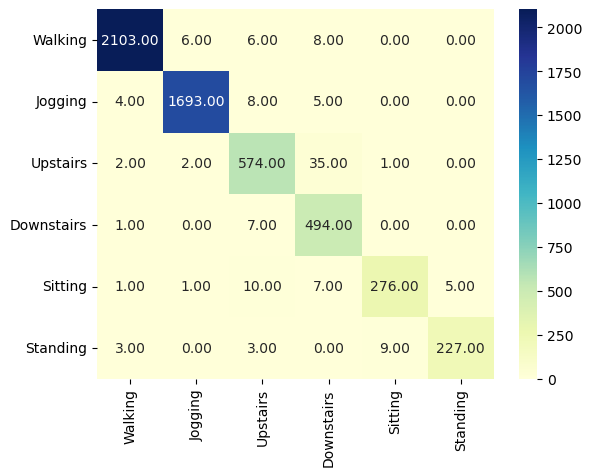

In [50]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [52]:
#512-64
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=512, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_30 (Conv1D)          (None, 194, 512)          11264     
                                                                 
 conv1d_31 (Conv1D)          (None, 188, 64)           229440    
                                                                 
 dropout_30 (Dropout)        (None, 188, 64)           0         
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 94, 64)           0         
 g1D)                                                            
                                                                 
 lstm_15 (LSTM)              (None, 90)                55800     
                                                                 
 dropout_31 (Dropout)        (None, 90)                0         
                                                     

In [53]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 01:08:41.254643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:08:41.493245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:08:42.273292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7123 - accuracy: 0.7594

2024-05-06 01:09:02.966862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:09:03.054511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 27s 77ms/step - loss: 0.7123 - accuracy: 0.7594 - val_loss: 0.5456 - val_accuracy: 0.8058
Epoch 2/20
275/275 [==============================] - 17s 61ms/step - loss: 0.4842 - accuracy: 0.8243 - val_loss: 0.3942 - val_accuracy: 0.8502
Epoch 3/20
275/275 [==============================] - 17s 61ms/step - loss: 0.3344 - accuracy: 0.8757 - val_loss: 0.4624 - val_accuracy: 0.8345
Epoch 4/20
275/275 [==============================] - 17s 61ms/step - loss: 0.2971 - accuracy: 0.8920 - val_loss: 0.3783 - val_accuracy: 0.8837
Epoch 5/20
275/275 [==============================] - 17s 61ms/step - loss: 0.2504 - accuracy: 0.9067 - val_loss: 0.2358 - val_accuracy: 0.9139
Epoch 6/20
275/275 [==============================] - 17s 61ms/step - loss: 0.1903 - accuracy: 0.9341 - val_loss: 0.1733 - val_accuracy: 0.9399
Epoch 7/20
275/275 [==============================] - 17s 62ms/step - loss: 0.1780 - accuracy: 0.9388 - val_loss: 0.1471 - val_accuracy: 0.9485
Epo

2024-05-06 01:15:08.853308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:15:08.939111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 21ms/step
f1_score =  0.9817114418645841
0.9816062647969405
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.94      0.96      0.95       614
           3       0.93      0.97      0.95       502
           4       0.99      0.95      0.97       300
           5       0.98      0.98      0.98       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

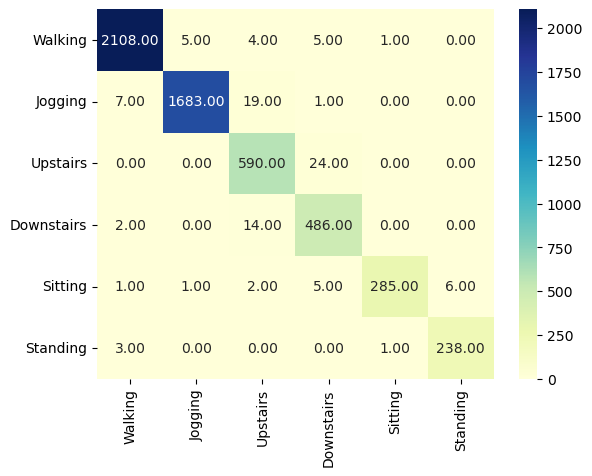

In [54]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [55]:
#512-128
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=512, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=128, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_32 (Conv1D)          (None, 194, 512)          11264     
                                                                 
 conv1d_33 (Conv1D)          (None, 188, 128)          458880    
                                                                 
 dropout_32 (Dropout)        (None, 188, 128)          0         
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 94, 128)          0         
 g1D)                                                            
                                                                 
 lstm_16 (LSTM)              (None, 90)                78840     
                                                                 
 dropout_33 (Dropout)        (None, 90)                0         
                                                     

In [56]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 01:15:41.796224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:15:42.020912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:15:42.744494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7886 - accuracy: 0.7334

2024-05-06 01:16:04.209150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:16:04.312571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 27s 79ms/step - loss: 0.7886 - accuracy: 0.7334 - val_loss: 0.4838 - val_accuracy: 0.8138
Epoch 2/20
275/275 [==============================] - 17s 61ms/step - loss: 0.4529 - accuracy: 0.8315 - val_loss: 0.3976 - val_accuracy: 0.8559
Epoch 3/20
275/275 [==============================] - 17s 61ms/step - loss: 0.3395 - accuracy: 0.8730 - val_loss: 0.2845 - val_accuracy: 0.8896
Epoch 4/20
275/275 [==============================] - 17s 62ms/step - loss: 0.2904 - accuracy: 0.8907 - val_loss: 0.2398 - val_accuracy: 0.9028
Epoch 5/20
275/275 [==============================] - 17s 61ms/step - loss: 0.2372 - accuracy: 0.9125 - val_loss: 0.2266 - val_accuracy: 0.9146
Epoch 6/20
275/275 [==============================] - 17s 61ms/step - loss: 0.2033 - accuracy: 0.9293 - val_loss: 0.1583 - val_accuracy: 0.9485
Epoch 7/20
275/275 [==============================] - 17s 62ms/step - loss: 0.1819 - accuracy: 0.9391 - val_loss: 0.1424 - val_accuracy: 0.9508
Epo

2024-05-06 01:21:47.386292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:21:47.484807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 21ms/step
f1_score =  0.9820495921845621
0.9819704971771991
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2123
           1       1.00      0.99      0.99      1710
           2       0.95      0.94      0.94       614
           3       0.92      0.96      0.94       502
           4       0.99      0.99      0.99       300
           5       0.99      0.98      0.99       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

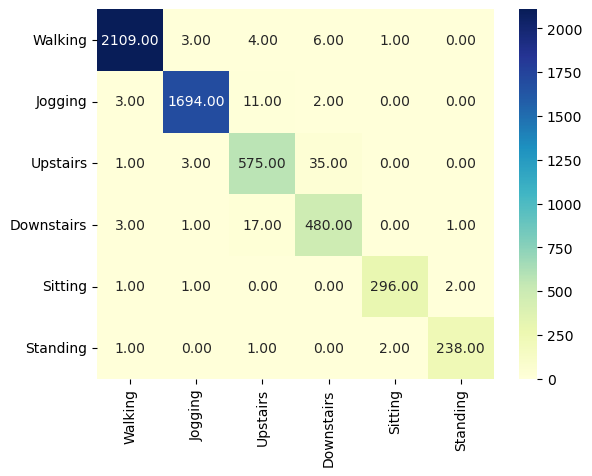

In [57]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [58]:
#512-256
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=512, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=256, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_34 (Conv1D)          (None, 194, 512)          11264     
                                                                 
 conv1d_35 (Conv1D)          (None, 188, 256)          917760    
                                                                 
 dropout_34 (Dropout)        (None, 188, 256)          0         
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 94, 256)          0         
 g1D)                                                            
                                                                 
 lstm_17 (LSTM)              (None, 90)                124920    
                                                                 
 dropout_35 (Dropout)        (None, 90)                0         
                                                     

In [59]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 01:22:12.364610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:22:12.577656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:22:13.332258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.8161 - accuracy: 0.7232

2024-05-06 01:22:35.284357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:22:35.372663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 27s 80ms/step - loss: 0.8161 - accuracy: 0.7232 - val_loss: 0.5851 - val_accuracy: 0.8001
Epoch 2/20
275/275 [==============================] - 17s 63ms/step - loss: 0.5350 - accuracy: 0.8094 - val_loss: 0.4140 - val_accuracy: 0.8456
Epoch 3/20
275/275 [==============================] - 17s 62ms/step - loss: 0.3745 - accuracy: 0.8651 - val_loss: 0.2867 - val_accuracy: 0.8934
Epoch 4/20
275/275 [==============================] - 17s 63ms/step - loss: 0.2836 - accuracy: 0.8999 - val_loss: 0.2388 - val_accuracy: 0.9094
Epoch 5/20
275/275 [==============================] - 17s 62ms/step - loss: 0.2196 - accuracy: 0.9254 - val_loss: 0.1863 - val_accuracy: 0.9408
Epoch 6/20
275/275 [==============================] - 18s 64ms/step - loss: 0.1922 - accuracy: 0.9388 - val_loss: 0.1747 - val_accuracy: 0.9481
Epoch 7/20
275/275 [==============================] - 17s 62ms/step - loss: 0.1847 - accuracy: 0.9412 - val_loss: 0.1585 - val_accuracy: 0.9451
Epo

2024-05-06 01:30:24.764397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:30:24.861618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 22ms/step
f1_score =  0.9742592391165603
0.9743216171917684
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2123
           1       0.98      0.99      0.99      1710
           2       0.92      0.97      0.94       614
           3       0.97      0.89      0.93       502
           4       1.00      0.95      0.98       300
           5       0.93      0.99      0.96       242

    accuracy                           0.97      5491
   macro avg       0.96      0.96      0.96      5491
weighted avg       0.97      0.97      0.97      5491



<Axes: >

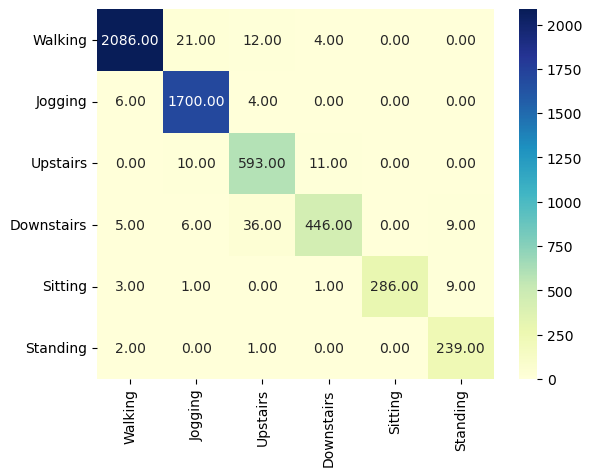

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [61]:
#512-256
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=512, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=512, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 194, 512)          11264     
                                                                 
 conv1d_37 (Conv1D)          (None, 188, 512)          1835520   
                                                                 
 dropout_36 (Dropout)        (None, 188, 512)          0         
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 94, 512)          0         
 g1D)                                                            
                                                                 
 lstm_18 (LSTM)              (None, 90)                217080    
                                                                 
 dropout_37 (Dropout)        (None, 90)                0         
                                                     

In [62]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-06 01:31:37.977383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:31:38.206734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:31:38.993523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.8329 - accuracy: 0.7234

2024-05-06 01:32:04.158183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:32:04.262696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 31s 93ms/step - loss: 0.8329 - accuracy: 0.7234 - val_loss: 0.5493 - val_accuracy: 0.8051
Epoch 2/20
275/275 [==============================] - 20s 74ms/step - loss: 0.4724 - accuracy: 0.8298 - val_loss: 0.3313 - val_accuracy: 0.8802
Epoch 3/20
275/275 [==============================] - 21s 75ms/step - loss: 0.3451 - accuracy: 0.8695 - val_loss: 0.2775 - val_accuracy: 0.8784
Epoch 4/20
275/275 [==============================] - 21s 75ms/step - loss: 0.3046 - accuracy: 0.8845 - val_loss: 0.2649 - val_accuracy: 0.8921
Epoch 5/20
275/275 [==============================] - 22s 78ms/step - loss: 0.2730 - accuracy: 0.9017 - val_loss: 0.1906 - val_accuracy: 0.9406
Epoch 6/20
275/275 [==============================] - 21s 78ms/step - loss: 0.2289 - accuracy: 0.9234 - val_loss: 0.1633 - val_accuracy: 0.9417
Epoch 7/20
275/275 [==============================] - 21s 78ms/step - loss: 0.2011 - accuracy: 0.9341 - val_loss: 0.1669 - val_accuracy: 0.9388
Epo

2024-05-06 01:39:25.585193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-06 01:39:25.686527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 22ms/step
f1_score =  0.9758794526322686
0.975960662902932
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       0.99      0.99      0.99      1710
           2       0.93      0.95      0.94       614
           3       0.95      0.92      0.94       502
           4       0.95      0.96      0.95       300
           5       0.99      0.91      0.95       242

    accuracy                           0.98      5491
   macro avg       0.97      0.95      0.96      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

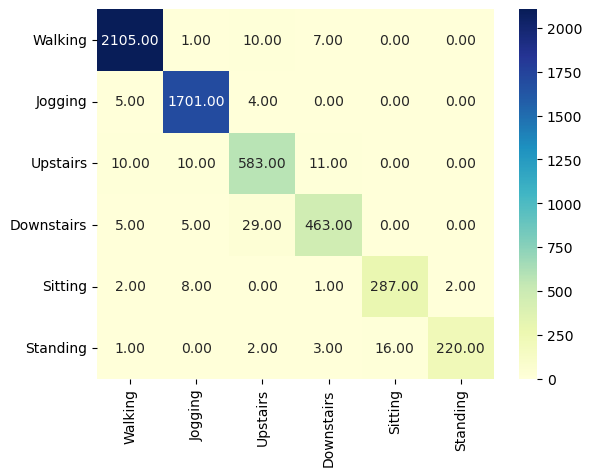

In [63]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')